# Neural Networks

<font color="blue"> Dhananjay Arora </font>

# I. Overview

Aim of this notebook is to inspire us to learn more about neural networks. So, we are learning and applying neural networks. Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.
We will understand more about calculating the weights.

Neural Networks can be used for regression or classification. We will implement 2 algorithms:
- Non Linear Regression
- Non-Linear Logistic Regression

We will also perform cross-validation here in this assignment. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

Different hyperparameters will be tried for tuning.


# Data 
### (this section has regression and classification data visualization and analysis)

## a) Description - Introduction of data for regression & source

This dataset contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Source of the data**

This data is picked from UCI machine learning repository.
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.
URL for UCI repository - http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## b) Reading the data

- The data is present in a comma separated value file.
- Header information is there in the CSV file.

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as scipyst
complete_dataset=pd.read_csv('C:\\Users\\arora\\Documents\\Bike-Sharing-Dataset\\hour.csv')

## c) Data Pre-Processing

- Splitting the data into train and test sets.
- Remove null value rows, if any.

In [2]:
 def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

Splitting and checking the shape of both the sets, below:

In [3]:
data_partitions=partition_data(complete_dataset)
train_dataset=data_partitions[0]
print("Shape of training set",train_dataset.shape)
test_dataset=data_partitions[1]
print("Shape of test set",test_dataset.shape)

Shape of training set (13903, 17)
Shape of test set (3476, 17)


Checking the data type of all features and file storage size as below:

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 17 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 1.8+ MB


Performing some basic mathematical function on data set using describe() as below:

In [5]:
train_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,6952.000000,2.263828,0.378192,5.650147,11.546573,0.027404,2.999425,0.684457,1.419981,0.499170,0.478017,0.622996,0.194097,34.037977,140.601165,174.639143
std,4013.594731,1.036254,0.484953,3.218423,6.912235,0.163264,2.005710,0.464749,0.644060,0.197716,0.176614,0.198194,0.123023,47.341186,137.512367,166.955414
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3476.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,31.000000,37.000000
50%,6952.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,15.000000,107.000000,130.000000
75%,10427.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.283600,46.000000,202.000000,258.000000
max,13903.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,796.000000,957.000000


Listing the top 10 rows as below:

In [6]:
train_dataset.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Listing the last 10 rows as below:

In [7]:
train_dataset.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13893,13894,2012-08-07,3,1,8,2,0,2,1,1,0.70,0.6667,0.84,0.1343,6,7,13
13894,13895,2012-08-07,3,1,8,3,0,2,1,1,0.70,0.6667,0.84,0.0000,0,6,6
13895,13896,2012-08-07,3,1,8,4,0,2,1,1,0.68,0.6364,0.83,0.1343,2,7,9
13896,13897,2012-08-07,3,1,8,5,0,2,1,1,0.70,0.6667,0.79,0.1045,3,33,36
13897,13898,2012-08-07,3,1,8,6,0,2,1,2,0.70,0.6667,0.79,0.1940,3,176,179
13898,13899,2012-08-07,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343,21,481,502
13899,13900,2012-08-07,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642,41,664,705
13900,13901,2012-08-07,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343,44,283,327
13901,13902,2012-08-07,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343,89,161,250
13902,13903,2012-08-07,3,1,8,11,0,2,1,2,0.76,0.7273,0.66,0.0896,84,130,214


Checking whether the dataset contains any null value as below:

In [8]:
 train_dataset.isnull().sum().sort_values(ascending=False)

cnt           0
weekday       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
workingday    0
registered    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
instant       0
dtype: int64

Since, there is no null value in the dataset as it can be seen above, so dataset is already clean.

### Plot for understanding are as below:

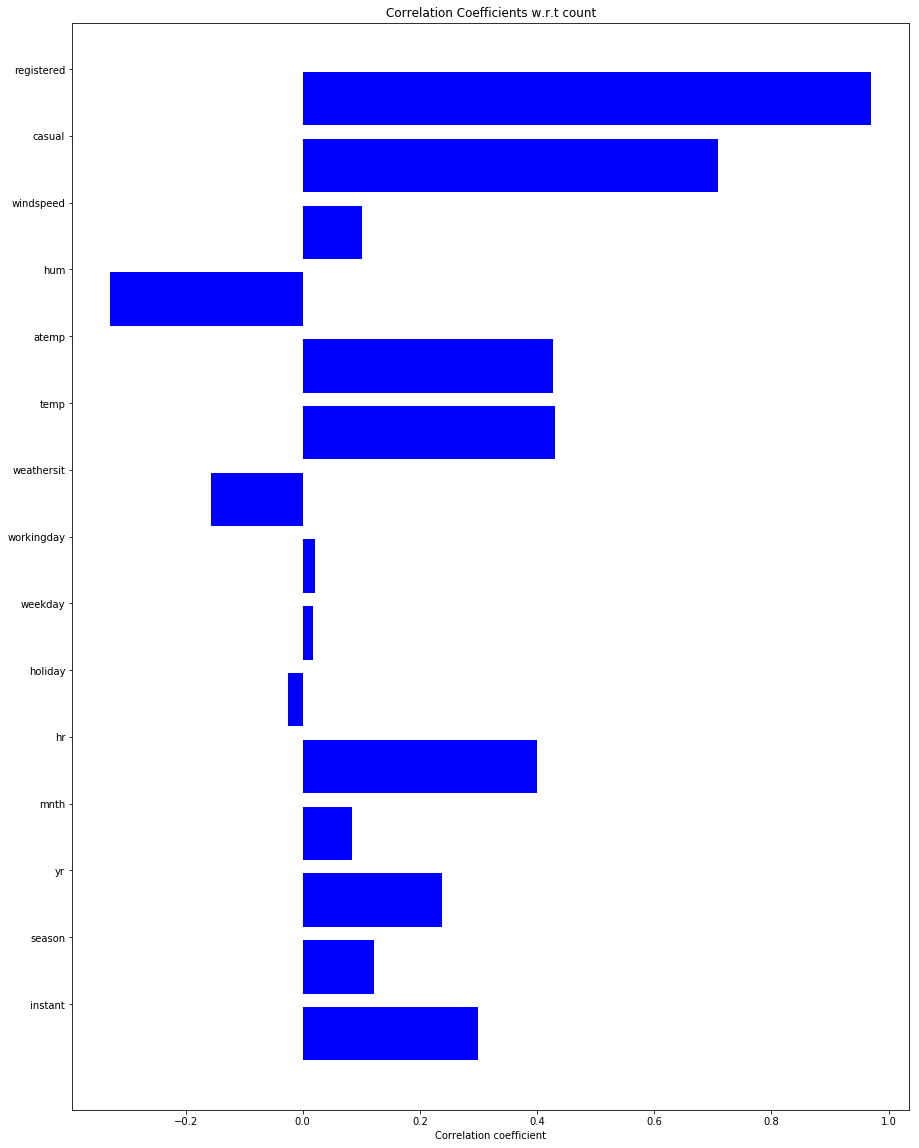

In [9]:
num_feat=train_dataset.columns[train_dataset.dtypes!=object]
num_feat=num_feat[0:-1]

labels = []
values = []


for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_dataset[col].values, train_dataset.cnt.values)[0,1])

ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,20))
rects = ax.barh(ind, np.array(values), color='blue')
ax.set_yticks(ind+((width)/1.8))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t count");

In the above image, it can be seen that number of registered users who use rental bikes is more than number of casual users.

Moreover, on working days bikes are rented more than on holidays.

Next, we will visualize **Correlation Matrix**:

It consists of a table depicting correlation coefficients among variables. Every entry in the table depicts the correlation among two variables.

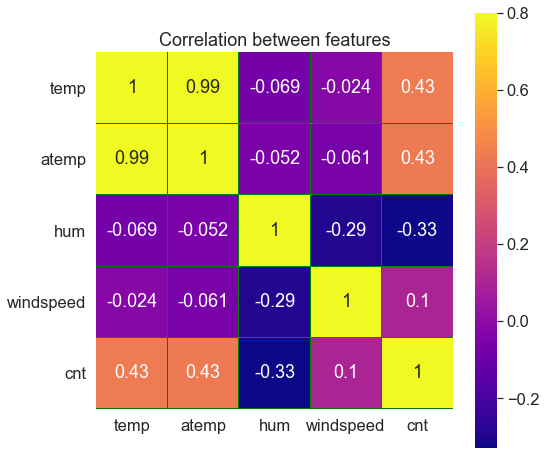

In [10]:
correlation_matrix=train_dataset[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(8, 8))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='plasma',linecolor="green")
plt.title('Correlation between features');

Above is the depiction of correlation between different features in the dataset.

Normalized temperature in Celsius is almost same as Normalized feeling temperature in Celsius, as per the figure above.

Below is the depiction of some features using pairplot:

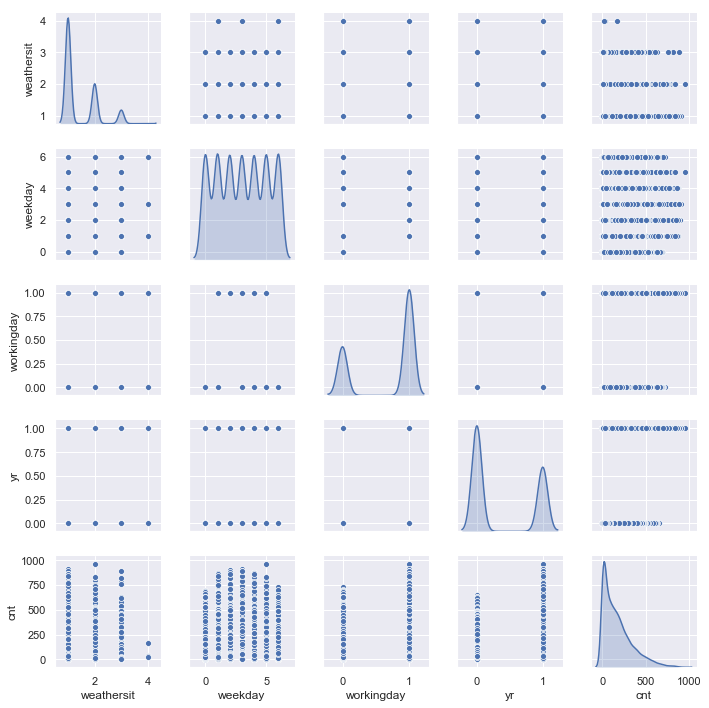

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
columns = ['weathersit', 'weekday', 'workingday', 'yr', 'cnt']
sns.pairplot(train_dataset[columns],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

From the above pair-plot, it can be seen that very few bikes are rented when the weather condition is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as compared to other weather conditions.

Also, It can be observed that on Satudays and Sundays, bikes are rented less as compared to other days.

On a working day, bikes are rented more. (*working days exclude holidays too*).

Bikes were rented more in year 2012 as compared to year 2011.

**Plotting the Distribution Curves for the feature variables as below:**

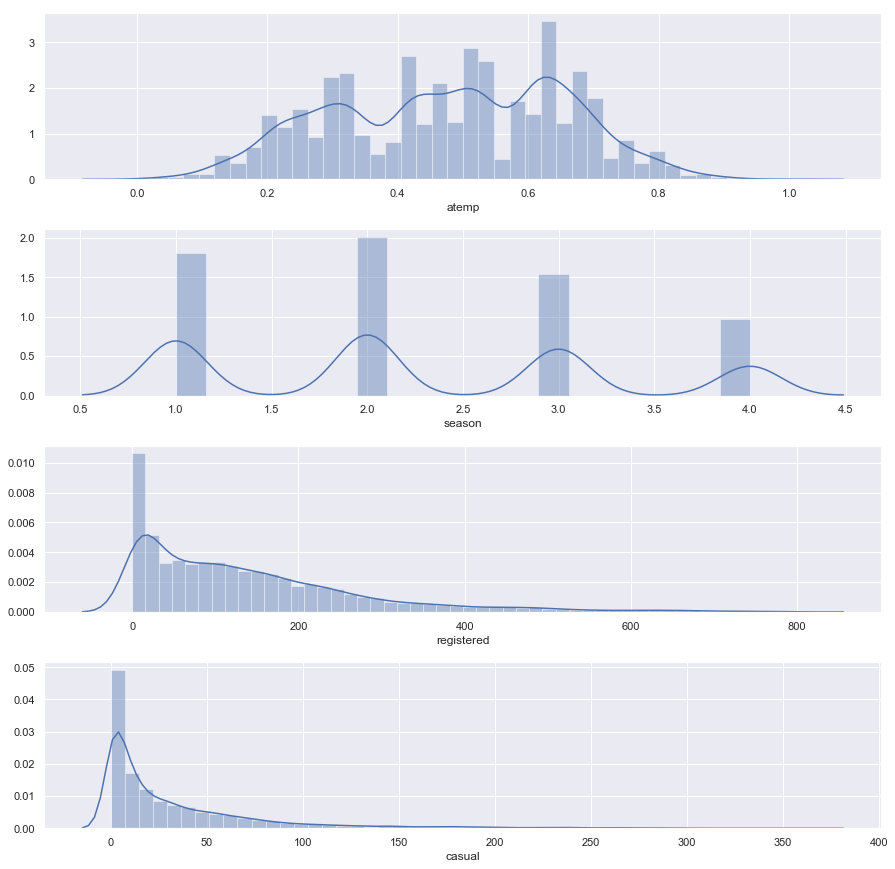

In [12]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
distribution_plot_list=['atemp', 'season', 'registered', 'casual']
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 5):
    ax = fig.add_subplot(4,1, i)
    ax = sns.distplot(train_dataset[distribution_plot_list[(i-1)]])

From the above figure, it can be observed that the values of Normalized feeling temperature is equally distributed.
    Also, highest registered customer count is around 850+ on a single day and highest casual customer count on a single day is somewhere around 350. Seasons are almost equally distributed where values denote(1:springe, 2:summer, 3:fall, 4:winter).

**Bar-plot of weather condition is as below:**

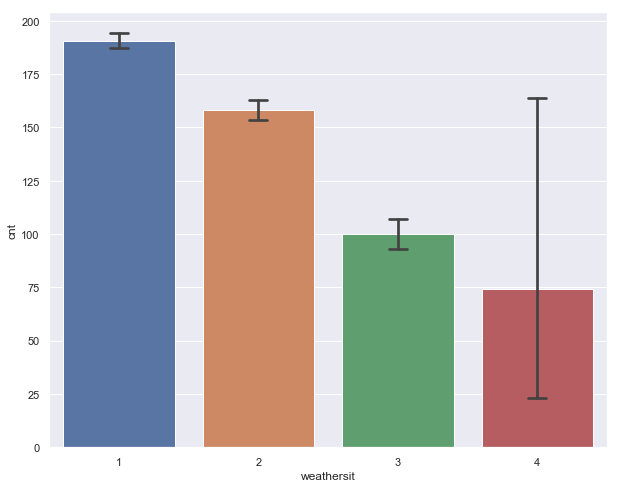

In [13]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="weathersit", y="cnt", data=train_dataset, capsize=.13)

Above bar plot shows that bikes are rented most when weather condition is 1; lesser than 1 in weather condition 2; lesser than 2 in weather condition 3 and least in weather condition 4. 

Below are those weather conditions:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Below is the point-plot for count vs normalized humidity**

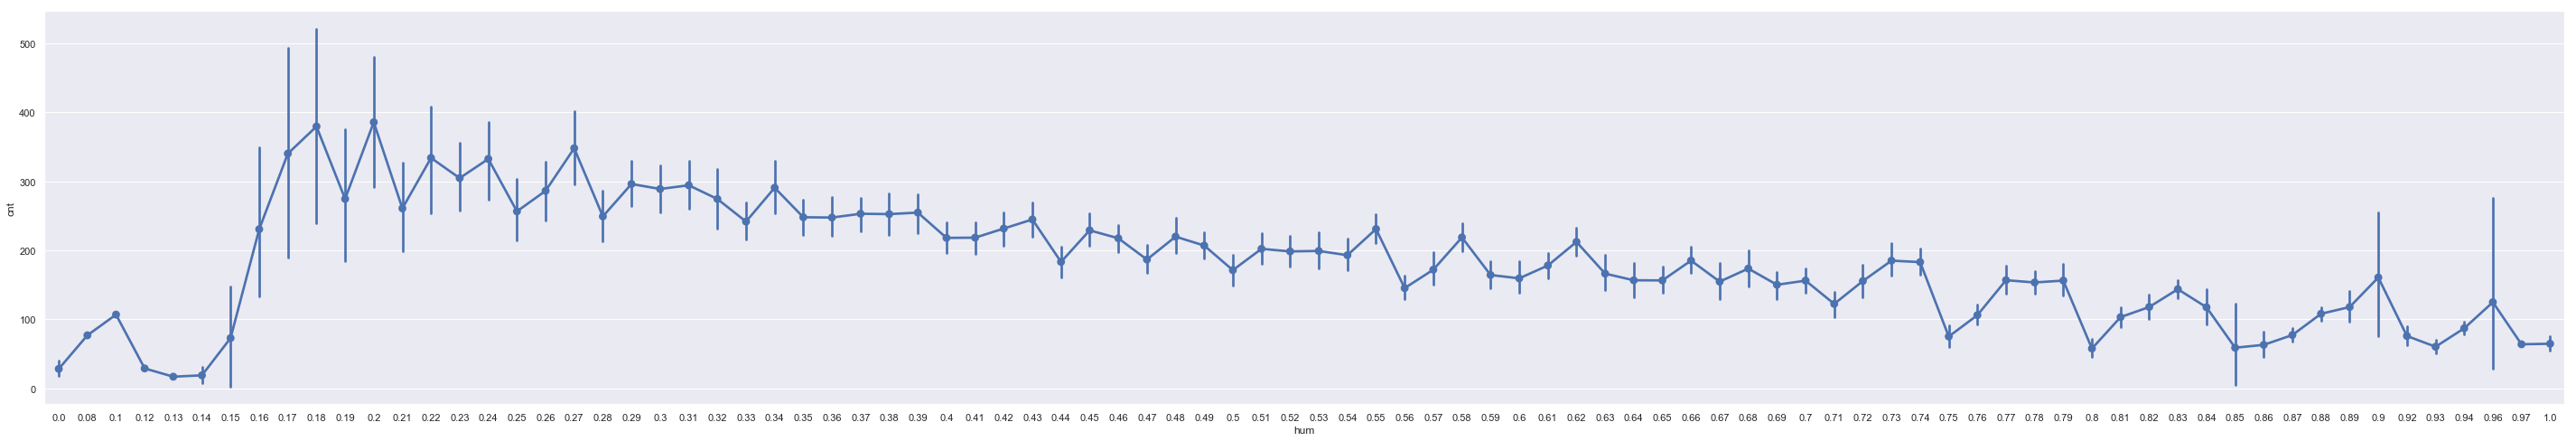

In [14]:
plt.figure(figsize=(50,8))
ax = sns.pointplot(x="hum",y="cnt",data= train_dataset)

Upon zooming above point-plot, it can be seen that most bikes are rented when normalized humidity value is near 0.2

**Below point-plot shows count of bikes vs weekday with heu as holiday**

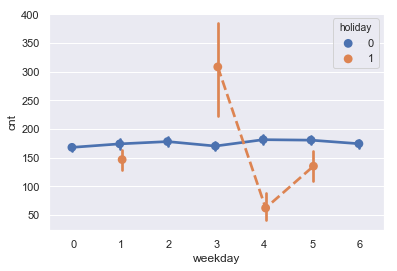

In [15]:
ax = sns.pointplot(x="weekday",y="cnt",hue="holiday",data= train_dataset, dodge=True, linestyles=["-","--"])

From the above point plot, it can be seen that count of bikes rented is usually the same for all days when it is not a holiday. But when it is a holiday, then the count of bikes rented is most on a Wednesday and least on a Tuesday.

**Below is the bar plot for bike rented at different hours**

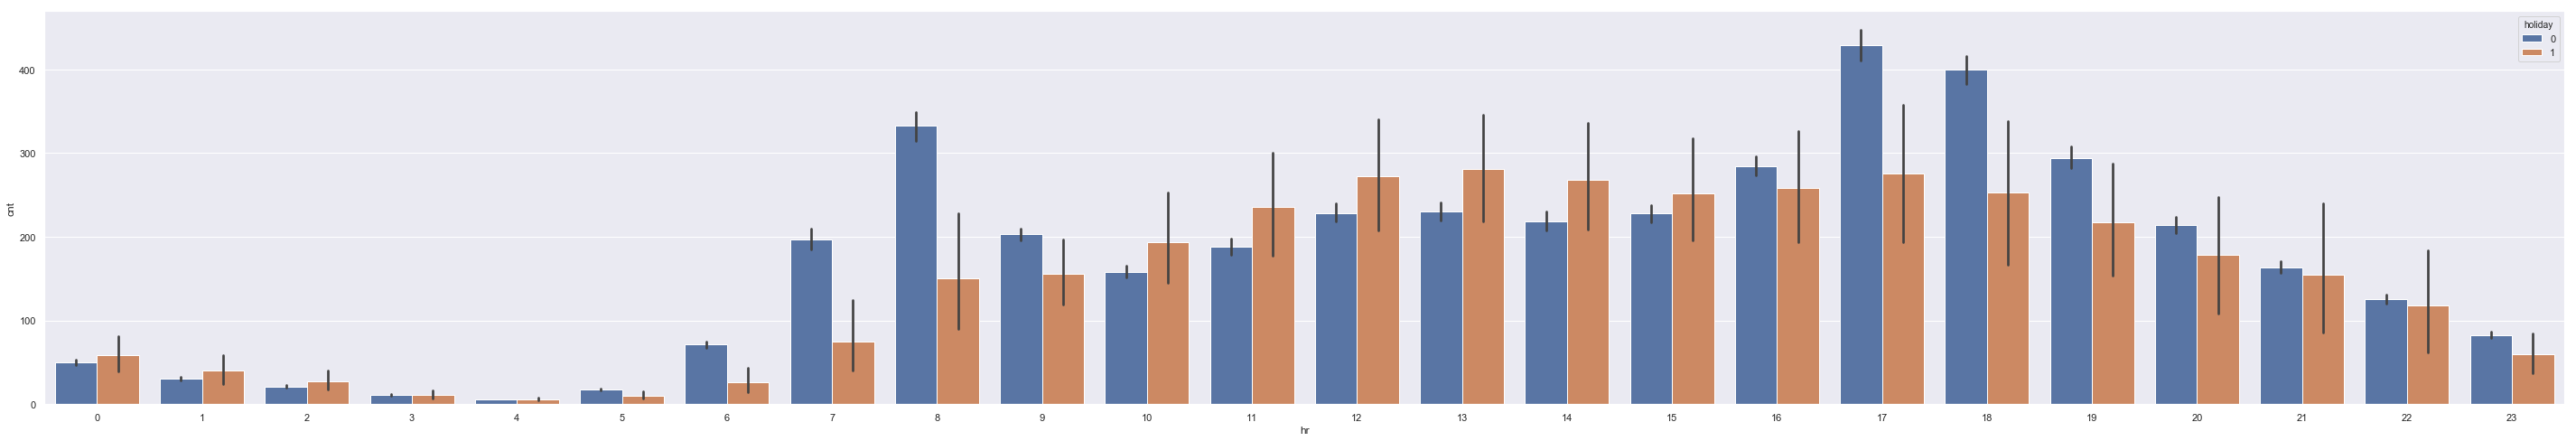

In [16]:
plt.figure(figsize=(50,8))
ax = sns.barplot(x="hr",y="cnt",hue="holiday",data= train_dataset)

From the above graph, it can be seen that most bikes were rented at 5PM on days which were not holidays; whereas on holidays, most bikes were rented at 1PM.

## e) Preliminary observation

Below is the list of observations from the regression data provided after doing regression analysis on the basis of plots:
- Number of registered users who use rental bikes is more than number of casual users.
- Moreover, on working days bikes are rented more than on holidays.
- Normalized temperature in Celsius is almost same as Normalized feeling temperature in Celsius
- It can be said that very few bikes are rented when the weather condition is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as compared to other weather conditions.
- Also, it can be observed that on Saturdays and Sundays, bikes are rented less as compared to other days.
- On a working day, more number of bikes are rented. (*working days exclude holidays too*).
- Bikes were rented more in year 2012 as compared to year 2011.
- Also, highest registered customer count is around 850+ on a single day and highest casual customer count on a single day is somewhere around 350+. Seasons are almost equally distributed where values denote(1:springe, 2:summer, 3:fall, 4:winter).
- Bikes are rented most when weather condition is 1; lesser than 1 in weather condition 2; lesser than 2 in weather condition 3 and least in weather condition 4. These weather conditions are namely:
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Most bikes are rented when normalized humidity value is near 0.2
- Count of bikes rented is usually the same for all days when the day is not a holiday. But when it is a holiday, then the count of bikes rented is the most on a Wednesday and least on a Tuesday.
- It can be seen that most bikes were rented at 5PM on days which were not holidays; whereas on holidays, most bikes were rented at 1PM.

Some other observations are also there and are listed above along with the plots.

# Classification Analysis

## a) Introduction of data for Classification & source

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There is a dataset: 
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:
Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Source**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## b) Reading the data

- The data is present in a comma separated value file. Fetching the records from the CSV file.
- Header information is there in the CSV file.

In [17]:
import pandas as pd
import numpy as np
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst

Reading dataset and making a feature list.

In [18]:
c_data_columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
c_complete_data= pd.read_csv("C:\\Users\\arora\\Documents\\bank-additional\\bank-additional-full.csv")

## c) Preprocessing of the data

Converting the target feature values as No = 0 and Yes = 1

In [19]:
c_complete_data['y'] = c_complete_data['y'].map({'no' : 0, 'yes' : 1})


In [20]:
print(c_complete_data['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


Checking the data type of the dataset

In [21]:
c_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

Printing count of rows and columns as below:

In [22]:
c_complete_data.shape

(41188, 21)

It can be seen that there are 41188 rows and 21 feature values.

Performing some basic mathematical function on data set using describe() as below:

In [23]:
c_complete_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Listing the top 10 rows as below:

In [24]:
c_complete_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Listing the last 10 rows as below:

In [25]:
c_complete_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


Checking whether the data contains any null value as below:

In [26]:
c_complete_data.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

There is no null value in the dataset as it can be seen above.

Extracting the important feature list as below:

In [27]:
c_important_cols=c_complete_data.columns.tolist()
c_feature_list=c_important_cols[:9] + c_important_cols[11:]
print(c_feature_list)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Defining the data partition method, below:

In [28]:
def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

Dividing the dataset into training and test set.

In [29]:
c_data_partitions=partition_data(c_complete_data)
c_train_dataset=c_data_partitions[0]
print("The Shape of train data set is",c_train_dataset.shape)
c_test_dataset=c_data_partitions[1]
c_test_dataset.shape
print("The Shape of test data set is",c_test_dataset.shape)

The Shape of train data set is (32950, 21)
The Shape of test data set is (8238, 21)


Some basic mathematical computataions on dataset are as below:

In [30]:
c_train_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.026586,255.954780,2.671259,993.752473,0.072868,0.650337,93.704204,-40.637542,4.268969,5195.140176,0.063733
std,9.354139,261.236307,2.970139,72.022331,0.274573,1.160255,0.480555,3.866698,1.283868,44.854437,0.244280
min,18.000000,0.000000,1.000000,0.000000,0.000000,-1.800000,92.756000,-50.000000,1.299000,5099.100000,0.000000
25%,33.000000,100.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.700000,4.191000,5191.000000,0.000000
50%,39.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.864000,5195.800000,0.000000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.000000
max,95.000000,4918.000000,56.000000,999.000000,3.000000,1.400000,94.465000,-36.100000,5.045000,5228.100000,1.000000


Top 10 rows, below:

In [31]:
c_train_dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Last 10 rows below:

In [32]:
c_train_dataset.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32940,46,admin.,married,basic.6y,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32941,25,student,single,high.school,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32942,27,entrepreneur,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32943,32,blue-collar,married,basic.6y,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32944,38,services,married,high.school,unknown,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32945,36,admin.,married,high.school,no,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32946,49,blue-collar,single,high.school,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32947,30,technician,single,basic.9y,no,no,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32948,32,technician,single,high.school,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32949,34,technician,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


Checking dataset for any null values below:

In [33]:
c_train_dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No null values seen above.

## d) Visualization of the data

Now we will vizualize the dataset.

**Plotting the Distribution Curves for the feature variables as below:**

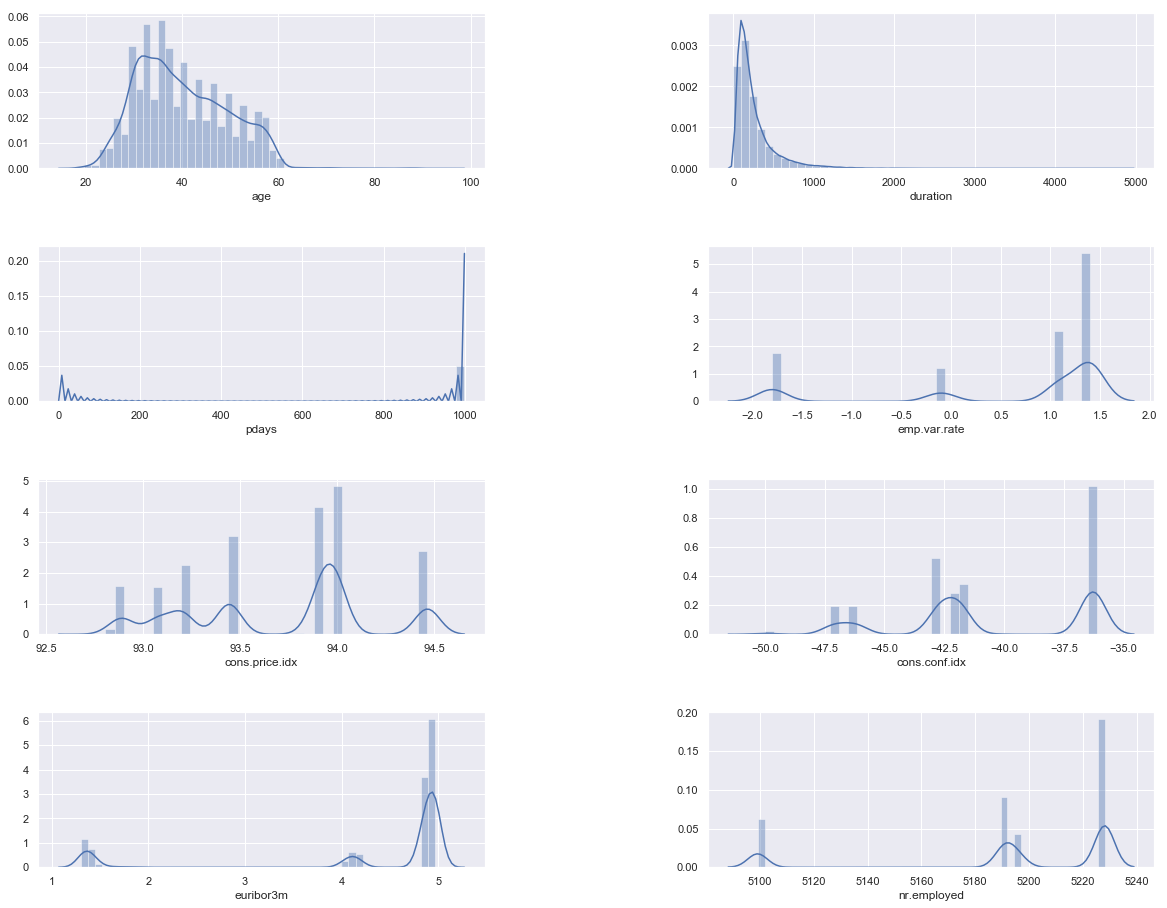

In [34]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['age','duration','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 9):
    ax = fig.add_subplot(5,2, i)
    ax = sns.distplot(c_train_dataset[distribution_plot_list[(i-1)]])

From the above image, it can be seen that mostly the age of customers is between 20 and 60. 

Also, consumer price index (monthly) is between 92.0 and 95.0

Since the number of pdays mostly is 999, that means most of the customers are new customers. 

Employment variation rate (quarterly indicator) value varies from -4 to 2.

Almost all individual call duration was between 0 and 1000 seconds.

Consumer confidence index (monthly indicator) value lies between -50 and -25 mostly.

Euribor 3 month rate - daily indicator mostly has value as 5.

Number of employees - quarterly indicator value varies from 4950 to 5250 mostly.

**Below is the correlation matrix**

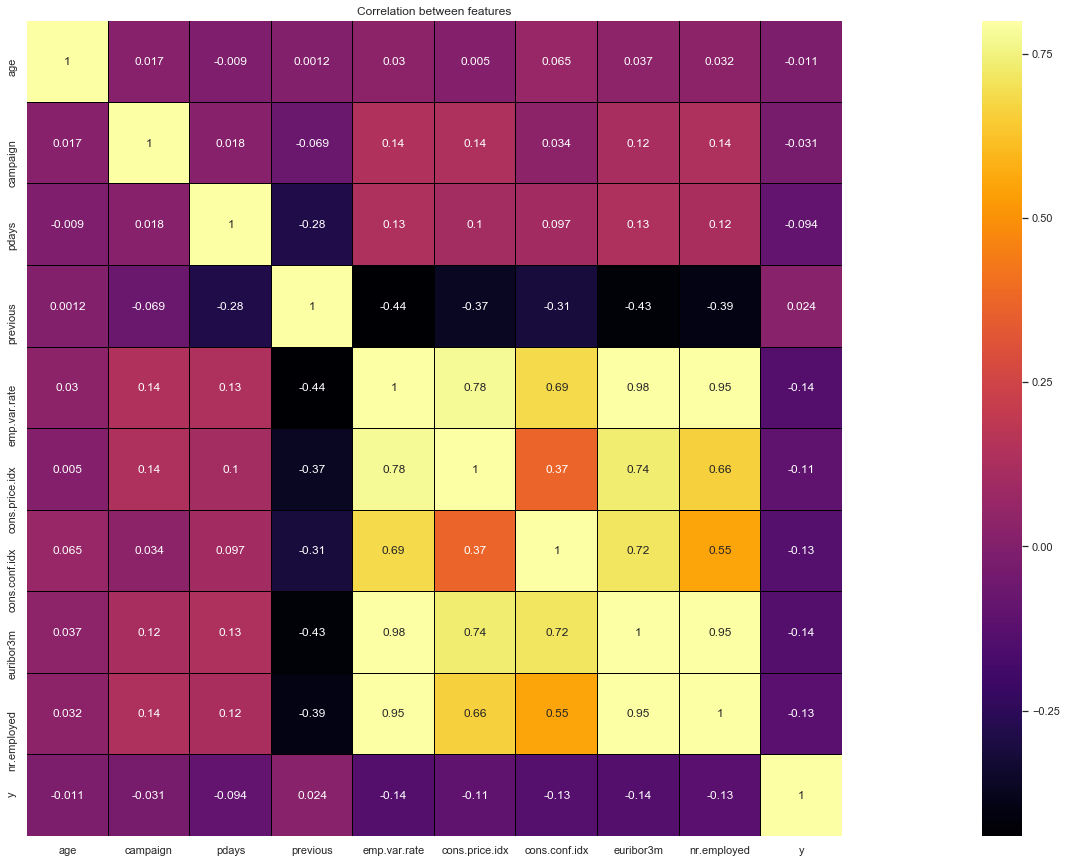

In [35]:
correlation_matrix=c_train_dataset[c_feature_list].corr()
sns.set(font_scale=1)
plt.figure(figsize=(50, 15))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='inferno',linecolor="black")
plt.title('Correlation between features');

Considering the above feature values, Number of contacts performed before this campaign and for this client is more related to client subscribing a term deposit as compared to other relations.

**Below is the bar-plot for client subscribing a term deposit vs his/her age**

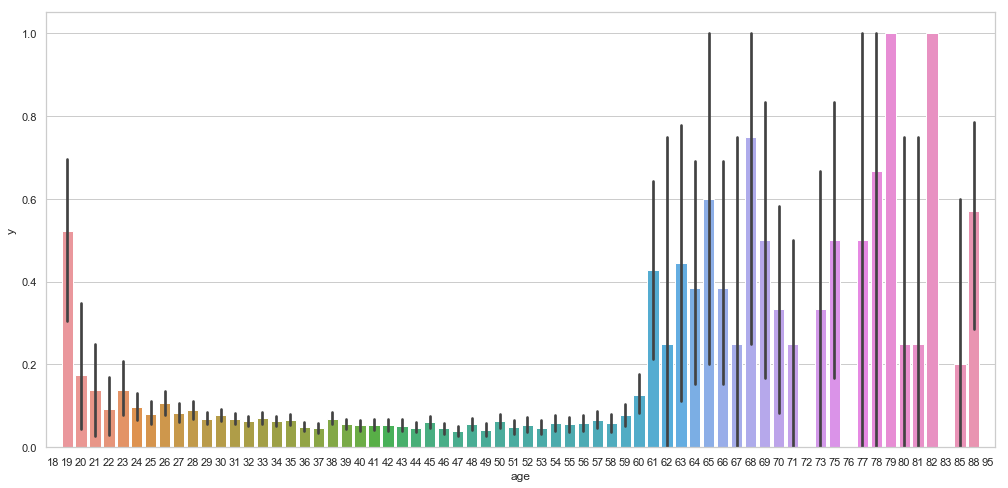

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,8))
ax = sns.barplot(x="age", y="y", data=c_train_dataset)

From the above bar-plot, it can be observed that major range of people who do not subscribe to the term deposit plan have age between 25 and 60. Elderly people subscribe the most to this plan.

Below is the bar plot for client subscribing a term deposit VS number of contacts performed during this campaign and for this client:

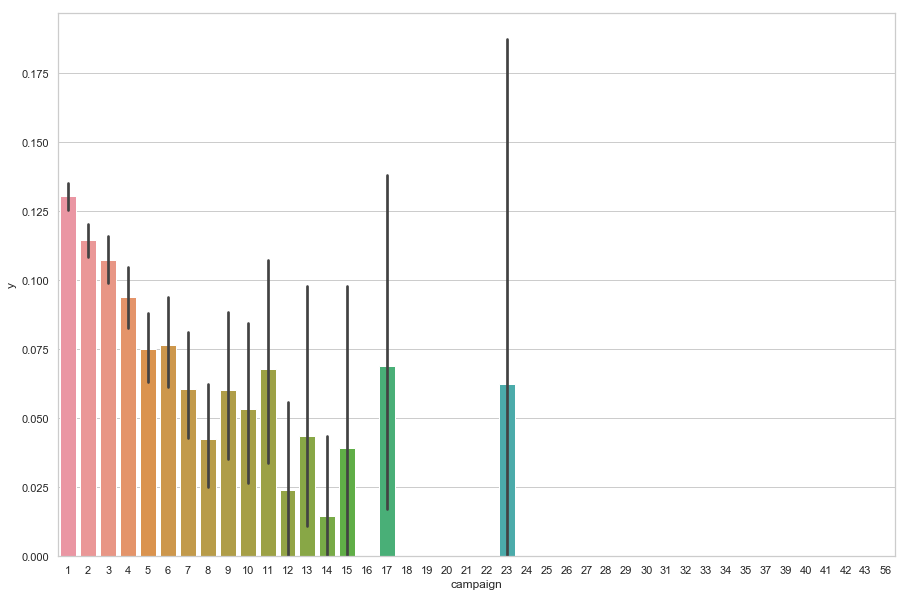

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="campaign", y="y", data=c_complete_data)

Most people bought the plan when the number of contacts performed during this campaign and for this client was 1. (observed from above figure) - on whole data

Below is the bar plot for client subscribing a term deposit VS type of job

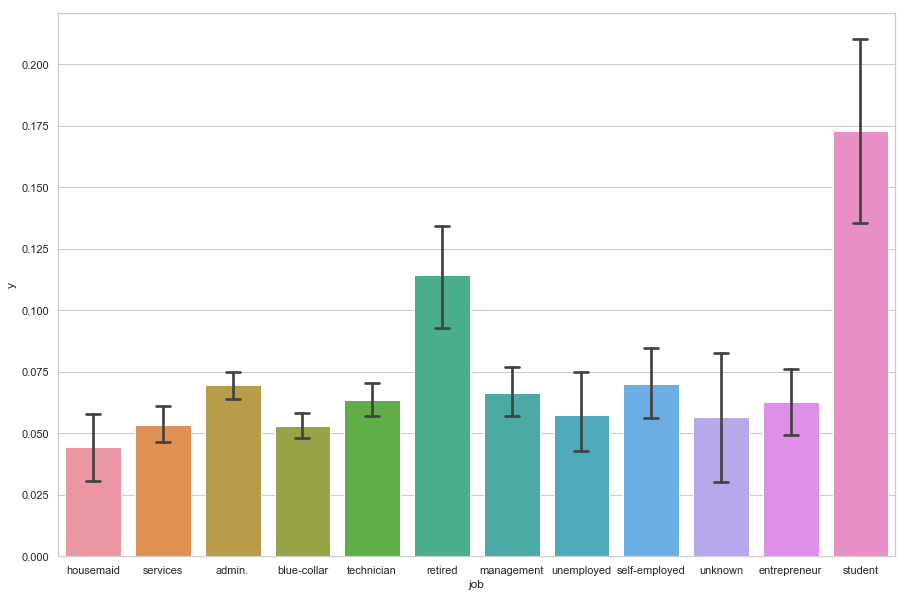

In [38]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="job", y="y", data=c_train_dataset, capsize=.2)

This above plot shows that students tend to subscribe more to the term-deposit plan and second come the retired people; whereas least term-deposit plans are subscribed by blue-collar job people and housemaid.

Below is the bar plot for client subscribing a term deposit VS their marital status:

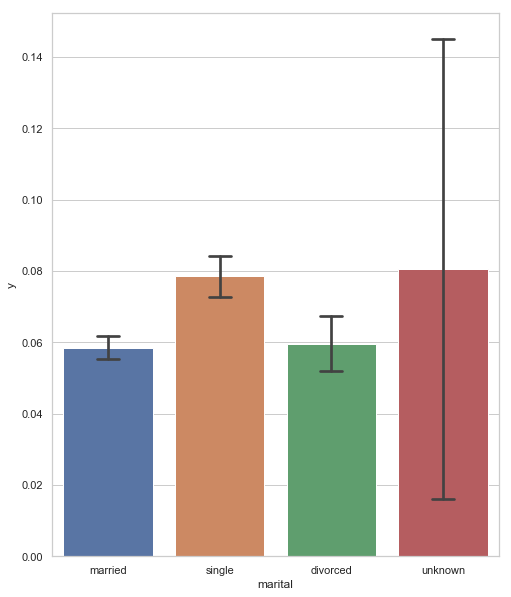

In [39]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x="marital", y="y", data=c_train_dataset, capsize=.2)

Mostly of the clients who have subscribed to term-deposit have not disclosed their marital status.
Second number is of clients who are single.

Below is the bar plot for client subscribing a term deposit VS education level:

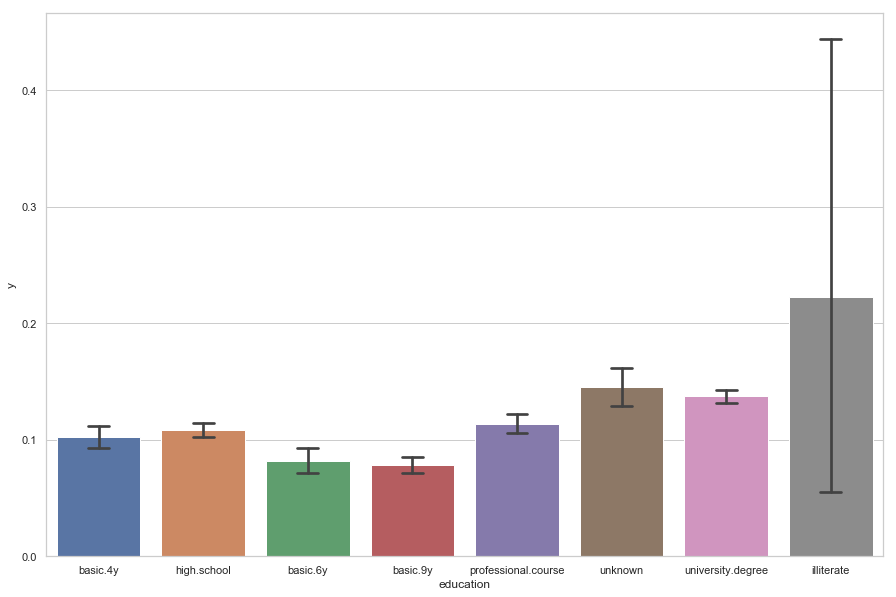

In [40]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="education", y="y", data=c_complete_data, capsize=.2)

Most clients who subscribe to this term-deposit plan are illiterate and least clients are those who have had only 9 years of education. (on complete data)

Below is the bar plot for client subscribing a term deposit VS clients having credit in default:

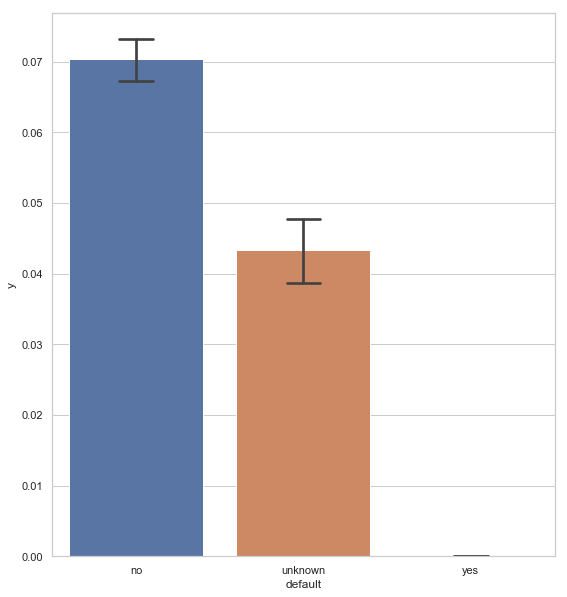

In [41]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="default", y="y", data=c_train_dataset, capsize=.2)

Most of the plans are bought by clients who have no credit in default.(seen from above plot)

Below is the bar plot for client subscribing a term deposit VS last contact month of year:

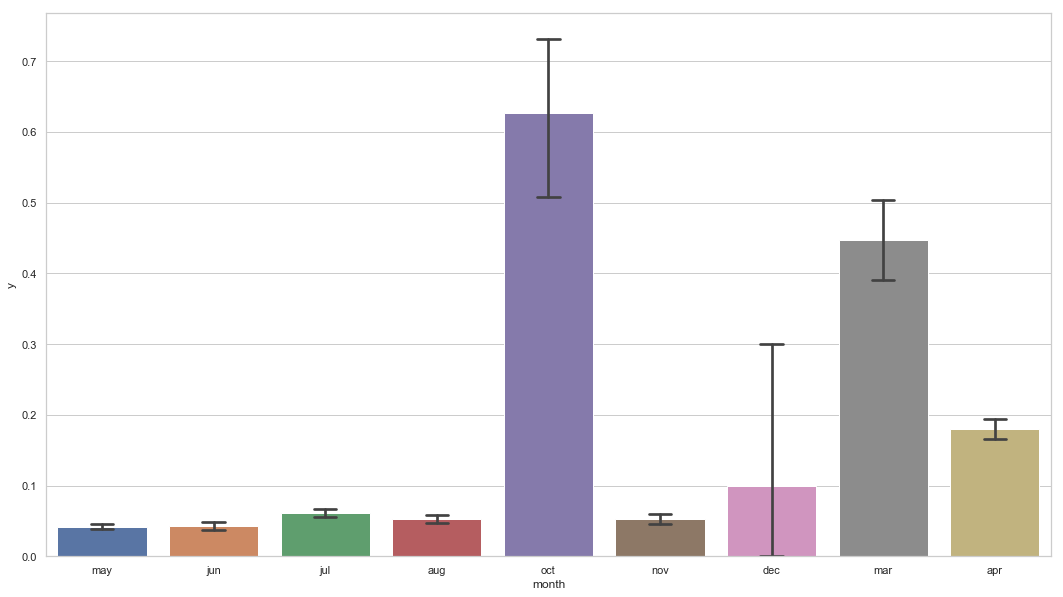

In [42]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x="month", y="y", data=c_train_dataset, capsize=.2)

Most term-deposits were subscribed in March and October(seen from plot above).

Below is the bar plot for client subscribing a term deposit VS the last contact day of the week:

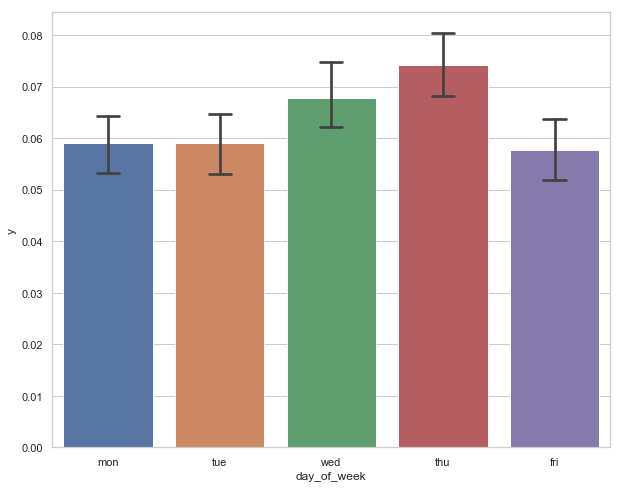

In [43]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="day_of_week", y="y", data=c_train_dataset, capsize=.2)

It can be observed from image above is that most of the term deposit were subscribed Thursdays.

Below is the bar plot for client subscribing a term deposit VS outcome of the previous marketing campaign:

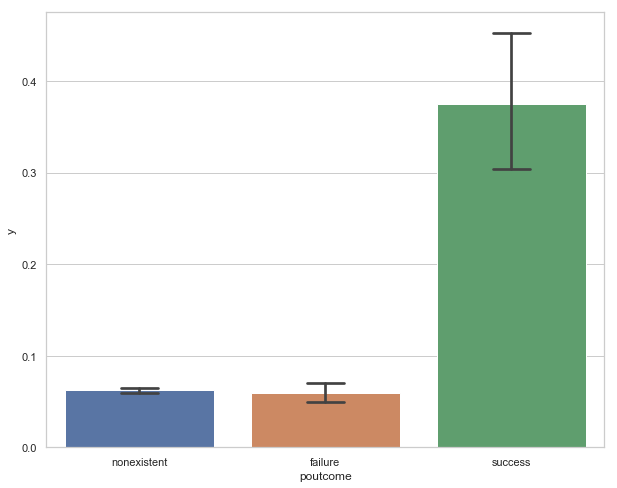

In [44]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="poutcome", y="y", data=c_train_dataset, capsize=.2)

In most cases, the outcome of the previous marketing campaign was success for those who subscribed to term deposit.

Below is the bar plot for client subscribing a term deposit VS Contact communication type:

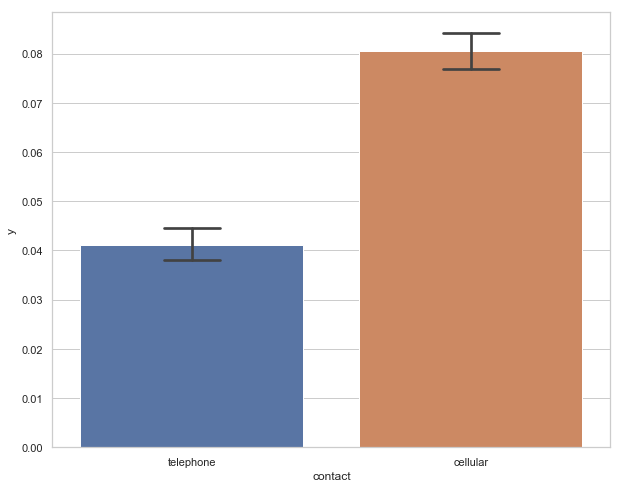

In [45]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="contact", y="y", data=c_train_dataset, capsize=.2)

It can be seen that most of the communication was cellular when a term deposit was subscribed.

## e) Preliminary observation

Below is the list of observations from the classification data provided.

Most clients who subscribed to the plan were:
- Elderly people (checked from age plot)
- when the number of contacts performed during this campaign and for this client was 1 (one)
- Students and retired clients
- Clients having no credit in default

Also, it was observed that most term-deposits were subscribed:
- in March and October months
- on Thursdays 
- when most of the communication was cellular.

Some other observations were also there and are listed above along with their plots.

# Methods

## Nonlinear Regression
- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 

## 5-fold Cross Validation
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies.

**5 FOLD Cross Validation (CV)**
- The process of deciding whether the numerical results quantifying hypothesized relationships between variables, are acceptable as descriptions of the data, is known as validation. 
- To check how good our model generalizes the new data to make good predictions on unseen data is known as cross validation (CV). 
- The objective of cross validation is to bound underfitting and overfitting.
- Dataset is divided in 3 sets, that is, test set, training set and validation set.
- Training dataset helps the model to get trained and accuracy can be measured via validation set.
- Data is split into k folds and iteration is performed on them.
- For each fold, we split the dataset into train dataset and validation dataset. Then we test the accuracy at each fold.
- This process is followed to avoid underfitting issue. In this way, every set is validated one time and trained k-1 time.
- We have tried 5-fold CV (k=5).

## Non-Linear Regression Model

- Multi layered neural network is being used to implement a non-linear regression model. 
- There are multiple nodes inside the network. These nodes are perceptrons. 
- Perceptron has the weighted sum of all the inputs.
- Also perceptron has the activation function to generate the output.
- Apart from input and output layer, all other layers are hidden layers.

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png"/>


- For the activation function, we need a smooth shaped function like the sigmoid function. 
- We take help of the forward propagation mechanism to achieve the output in case of neural networks.
- We have to train our network, so we should correct the weights on each edge. 
- In order to apply the feedback, we use the backpropagation technique to adjust weights for the best fit, and in this way we train the network with our data. 
- The gradient descent method is used to perform the backpropagation. 
- Gradient descent can be represented by the following equation:

$$
\begin{align}
\Vm &\leftarrow \Vm + \rho_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big), \\
\Wm &\leftarrow \Wm + \rho_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big)
\end{align}
$$
where $\rho_h$ are the learning rate for hidden and $\rho_o$ are the learning rate for output layer weights. 

- In this way, we will update the weights and train the neural network.

**Note: Summary of nonlinear logistic regression along with its implementation will come after when the whole nonlinear regression part is completed**

## Explanation of Codes
Below is the code by each class and their functions.

1. **Standardizer Class:**
    This class normalizes the input data in order to achieve better results. Normalization is done with the help of mean and standard deviation by calculating each feature's mean and standard deviation. 
    
2. **Neural Network Class:**
 - <b>Init Method:</b> 
 
This method is used for initialization of the neural network object. An array with the nn description is passed. 
Each element of the array consists the number of nodes in each layer starting from left to right. This method also initializes the weights for the network and the needed parameters. 
 - <b>add_ones:</b> 
 
 This method adds the bias values to the data. 
 - <b>get_nlayers:</b> 
 
This method returns the number of layers present.
 - <b>set_hunit:</b> 
 
This method set the initial values for the weights and update those values during the network training.
 - <b>pack:</b> 
 
 This method optimizes the calculations in code. 
 Motive of this method is to take weights from various layers within the network and packs them into a single vector of weights. 
 - <b>unpack:</b> 
 
This method is the opposite method of the pack method. It converts the single vector of weights from pack method into a matrix of weights. This is helpful method.
 - <b>cp_weight:</b> 
 
 This method copies the weights of a matrix into different matrix. 
 - <b>forward:</b> 
 
This method performs the forward propagation. 
The weighted sum at each node is calculated for every layer and if that node is an output node, then apply the activation function to produce the output.
 - <b>backward:</b> 
 
This function performs the backward propagation by taking the calculated error and updating weights in each layer.
 - <b>errorf:</b> 
 
This method computes the errors in output by estimating the difference in the expected output and prediction.
 - <b>optimtargetf:</b> 
 
This method is a optimization function. It takes help of the MSE parameter to optimize the weights.
 - <b>gradientf:</b> 
 
This function does the gradient descent by forward propagation and calculating the error and then doing backward propagation to update the weights.
 - <b>train:</b> 
 
This method takes the input data, the expected data and sets some initial parameters like the number of iterations, learning rate etc. It achieves the gradient descent to train the network.
 - <b>use:</b> 
 
This method does prediction from the trained network. It returns the prediction by forward propagating the input data in the trained network.

**Below is the code from 3 Python files provided by Professor in a3.zip**


In [46]:
# UTIL.PY

# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

In [47]:
#GRAD.PY
""" Gradient Descent optimization tools 
    
    Steepest descent and scaled conjugate gradient 
    are currently implemented. 
    Reference codes are R version of Chuck Anderson's.
    
    Reference
        Chong and Zak (2008).
          http://www.engr.colostate.edu/~echong/book3/
        Moller (1993).
          http://www.sciencedirect.com/science/article/pii/S0893608005800565

                                by lemin (Minwoo Jake Lee)
        
    last modified: 10/01/2011
"""

import numpy as np
import math
from copy import copy 
import pdb
from math import sqrt, ceil
import sys
import inspect


def lineno():
    """Returns the current line number in our program."""
    #print "::: ", inspect.currentframe().f_back.f_lineno
    return inspect.currentframe().f_back.f_lineno

###########################################################
###
### Scaled Conjugate Gradient 
###
###########################################################

def scg(w, gradf, optimf, *fargs, **params):

    wprecision = params.pop("wPrecision",1.e-8)
    fprecision = params.pop("fPrecision",1.e-8)
    niter = params.pop("nIterations",1000)

    wtracep = params.pop("wtracep",False)
    ftracep = params.pop("ftracep",False)

    bwmin = params.pop("bwmin",False)
    wmin  = params.pop("wmin",1)
    bwmax = params.pop("bwmax",False)
    wmax  = params.pop("wmax",1)

    bverbose = params.pop("verbose", False)
    _beta = params.pop("beta", 1e-6)

    while True: # outmost loop to restart for RGD
        nvars = len(w)
        sigma0 = 1.0e-10
        fold = optimf(w, *fargs)
        fnow = fold
        #f = fnow
        gradnew = gradf(w, *fargs)
        gradold = copy(gradnew)
        d = -gradnew				# Initial search direction.
        success = True				# Force calculation of directional derivs.
        nsuccess = .0				# nsuccess counts number of successes.
        beta = _beta				# Initial scale parameter.
        betamin = 1.0e-15 			# Lower bound on scale.
        betamax = 1.0e5			# Upper bound on scale.
        #betamax = 1.0e20			# Upper bound on scale.
        j = 1				# j counts number of iterations.

        wtrace = []
        if wtracep:
            wtrace.append(w)
        ftrace = []
        if ftracep:
            ftrace.append(fnow) #[0,0])
        
        while j <= niter:

            ## Calculate first and second directional derivatives.
            if success:
                mu = np.dot(d,gradnew)
                if bverbose and np.isnan(mu): print("mu is NaN")
                if mu >= 0:
                    d = - gradnew
                    mu = np.dot(d,gradnew)

                kappa = np.dot(d,d)
                if kappa < np.finfo(np.double).eps:
                    return {'w':w, 
                            'f':fnow, 
                            'reason':"limit on machine precision",
                            'wtrace':wtrace if wtracep else None, 
                            'ftrace':ftrace if ftracep else None }

                sigma = sigma0/math.sqrt(kappa)
                wplus = w + sigma * d
                gplus = gradf(wplus, *fargs)
                theta = np.dot(d, (gplus - gradnew))/sigma

            ## Increase effective curvature and evaluate step size alpha.
            delta = theta + beta * kappa
            if delta is np.nan: print("delta is NaN")
            if delta <= 0.:
                delta = beta * kappa
                beta = beta - theta/kappa
            
            alpha = -mu/delta
            #print "alpha:", alpha
            ## Calculate the comparison ratio.
            wnew = w + alpha * d
            fnew = optimf(wnew, *fargs)

            if bwmin and all(wnew <= wmin): 
                return {'w':w, 
                        'f':fnow, 
                        'reason':"limit on w min.(%f)" % wmin,
                        'wtrace':wtrace if wtracep else None, 
                        'ftrace':ftrace if ftracep else None }
            if bwmax and all(wnew >= wmax):
                return {'w':w, 
                        'f':fnow, 
                        'reason':"limit on w max.(%f)" % wmax,
                        'wtrace':wtrace if wtracep else None, 
                        'ftrace':ftrace if ftracep else None }

            Delta = 2. * (fnew - fold) / (alpha*mu)
            if not np.isnan(Delta) and Delta >= 0.:
                success = True
                nsuccess = nsuccess + 1
                w = wnew
                fnow = fnew
                if wtracep:
                    wtrace.append(w)
                if ftracep:
                    ftrace.append(fnow) #[0,0])
            else:
                success = False
                fnow = fold
            #f = fnow

            #if (j % (niter /10)) ==0 and bverbose:
            #    print "SCG: Iteration %d  f=%f  scale=%f" % (j, fnow, beta)

            if success:
                ## Test for termination
                if np.max(abs(alpha*d)) < wprecision:
                    return {'w':w, 
                            'f':fnow, 
                            'reason':"limit on w Precision",
                            'wtrace':wtrace if wtracep else None, 
                            'ftrace':ftrace if ftracep else None }
                elif np.max(abs(fnew-fold)) < fprecision:
                    return {'w':w, 
                            'f':fnow, 
                            'reason':"limit on f Precision",
                            'wtrace':wtrace if wtracep else None, 
                            'ftrace':ftrace if ftracep else None }
                else:
                    ## Update variables for new position
                    fold = fnew
                    gradold = gradnew
                    gradnew = gradf(w, *fargs)
                    ## If the gradient is zero then we are done.
                    if np.dot(gradnew, gradnew) == 0:
                        return {'w':w, 
                                'f':fnow, 
                                'reason':"zero gradient",
                                'wtrace':wtrace if wtracep else None, 
                                'ftrace':ftrace if ftracep else None }
              
            ## Adjust beta according to comparison ratio.
            if np.isnan(Delta) or Delta < 0.25:
                beta = min(4.0*beta, betamax)
            elif Delta > 0.75:
                beta = max(0.5*beta, betamin)

            ## Update search direction using Polak-Ribiere formula, or re-start 
            ## in direction of negative gradient after nparams steps.

            if nsuccess == nvars:
                d = -gradnew
                nsuccess = 0
            elif success:
                gamma = np.dot(gradold - gradnew, gradnew / mu)
                d = gamma * d - gradnew

            j = j + 1

        return {'w':w, 
                'f':fnow, 
                'reason':"reached limit of nIterations",
                'wtrace':wtrace if wtracep else None, 
                'ftrace':ftrace if ftracep else None }



######################################################################
### Steepest descent
    

floatPrecision = sys.float_info.epsilon

def steepest(x,gradf, f, *fargs, **params):
    """steepest:
    Example:
    def parabola(x,xmin,s):
        d = x - xmin
        return np.dot( np.dot(d.T, s), d)
    def parabolaGrad(x,xmin,s):
        d = x - xmin
        return 2 * np.dot(s, d)
    center = np.array([5,5])
    S = np.array([[5,4],[4,5]])
    firstx = np.array([-1.0,2.0])
    r = steepest(firstx, parabola, parabolaGrad, center, S,
                 stepsize=0.01,xPrecision=0.001, nIterations=1000)
    print('Optimal: point',r[0],'f',r[1])"""

    stepsize= params.pop("stepsize",0.1)
    evalFunc = params.pop("evalFunc",lambda x: "Eval "+str(x))
    nIterations = params.pop("nIterations",1000)
    xPrecision = params.pop("xPrecision",1.e-8)
    fPrecision = params.pop("fPrecision",1.e-8)
    wtracep = params.pop("wtracep",False)
    ftracep = params.pop("ftracep",False)

    i = 1
    if wtracep:
        wtrace = np.zeros((nIterations+1,len(x)))
        wtrace[0,:] = x
    else:
        wtrace = None
    oldf = f(x,*fargs)
    if ftracep:
        ftrace = [0] * (nIterations+1) #np.zeros(nIterations+1)
        ftrace[0] = f(x,*fargs)# [0,0]
    else:
        ftrace = None
  
    while i <= nIterations:
        g = gradf(x,*fargs)
        newx = x - stepsize * g
        newf = f(newx,*fargs)
        #if i % max(1,(nIterations/10)) == 0:
        #    print "Steepest: Iteration",i,"Error",evalFunc(newf)
        if wtracep:
            wtrace[i,:] = newx
        if ftracep:
            ftrace[i] = newf #[0,0]

        if np.any(newx == np.nan) or newf == np.nan:
            raise ValueError("Error: Steepest descent produced newx that is NaN. Stepsize may be too large.")
        if np.any(np.isinf(newx)) or  np.isinf(newf):
            raise ValueError("Error: Steepest descent produced newx that is NaN. Stepsize may be too large.")
        if max(abs(newx - x)) < xPrecision:
            return {'w':newx, 'f':newf, 'nIterations':i, 'wtrace':wtrace[:i,:] if wtracep else None, 'ftrace':ftrace[:i] if ftracep else None,
                    'reason':"limit on x precision"}
        if abs(newf - oldf) < fPrecision:
            return {'w':newx, 'f':newf, 'nIterations':i, 'wtrace':wtrace[:i,:] if wtracep else None, 'ftrace':ftrace[:i] if ftracep else None,
                    'reason':"limit on f precision"}
        x = newx
        oldf = newf
        i += 1

    return {'w':newx, 'f':newf, 'nIterations':i, 'wtrace':wtrace[:i,:] if wtracep else None, 'ftrace':ftrace[:i] if ftracep else None, 'reason':"did not converge"}




In [48]:
## NN.PY

""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
#from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

Now, let's perform pre-processing for regression.

In [50]:
# Pre-Processing for Regression
from sklearn import metrics
# Kept only the rows in which a bike was rented.
trial=train_dataset[train_dataset['cnt']!=0]

#Encoding Weekday
weekday_values=trial['weekday'].values
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
weekday_int_encode=label_encoder.fit_transform(weekday_values)
hot_encoder=preprocessing.OneHotEncoder(sparse=False)
weekday_int_encode = weekday_int_encode.reshape(len(weekday_int_encode), 1)
weekday_onehot_encoded=hot_encoder.fit_transform(weekday_int_encode)

#Encoding Month
mnth_values=trial['mnth'].values
label_encoder=preprocessing.LabelEncoder()
mnth_int_encode=label_encoder.fit_transform(mnth_values)
hot_encoder=preprocessing.OneHotEncoder(sparse=False)
mnth_int_encode = mnth_int_encode.reshape(len(mnth_int_encode), 1)
mnth_onehot_encoded=hot_encoder.fit_transform(mnth_int_encode)

# Temperature and Humidity
temp_vector=trial['temp'].values
hum_vector=trial['hum'].values

In [51]:
array_stacks=[temp_vector,hum_vector,weekday_onehot_encoded,mnth_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['cnt'].values

Below is the shape of X

In [52]:
X.shape

(13903, 21)

In [53]:
print(X)

[[0.24 0.81 0.   ... 0.   0.   0.  ]
 [0.22 0.8  0.   ... 0.   0.   0.  ]
 [0.22 0.8  0.   ... 0.   0.   0.  ]
 ...
 [0.7  0.74 0.   ... 0.   0.   0.  ]
 [0.74 0.7  0.   ... 0.   0.   0.  ]
 [0.76 0.66 0.   ... 0.   0.   0.  ]]


In [54]:
T.shape
T=trial['cnt'].values.reshape((-1, 1))

Let's TRAIN

In [55]:
nn = NeuralNet([21,5,1])
nn.train(X, T,ftracep=True)

{'w': array([ 2.18968841, -1.35063231, -3.710688  ,  2.70893357, -0.12799003,
        -2.14380803, -1.20944354,  2.8827912 , -7.89381625, -0.75058286,
         1.16179006, -0.1037042 , -2.33596263, -4.5285293 ,  0.51536159,
        -0.04087802,  0.0484972 , -1.49040887,  1.91330515,  0.10610985,
         0.43645301, -0.04803492,  0.08167741,  3.54896108,  0.0822234 ,
        -0.12919628,  0.09020642,  1.02166188, -4.54590469, -0.1497777 ,
         0.02222757, -0.02695747,  0.96350636, -0.29530588, -0.05644486,
         0.02461557,  0.01119421,  0.90332095, -0.73550176, -0.05837636,
        -0.16623046, -0.03584756,  1.46724411, -1.22447049, -0.0791263 ,
        -0.240351  ,  0.07485734, -2.83267812,  1.34101178,  0.17187906,
        -0.1442244 , -0.48030972, -0.23519162,  3.39082961,  0.1942765 ,
         1.64447686, -0.47465793, -1.07972768,  1.5926654 ,  0.27344234,
        -0.61268044,  0.4701602 , -0.33674028, -9.57933973, -0.72150506,
         0.06629858, -0.05611619,  0.58738685,

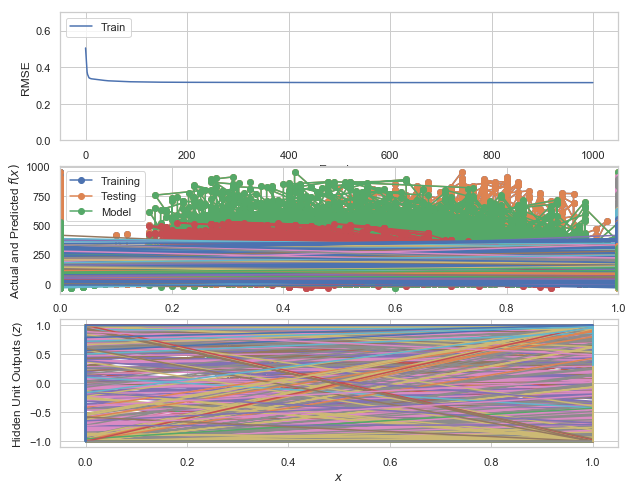

In [56]:
Y, Z = nn.use(X, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X,T,'o-',X,T,'o-',X,Y,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

In [57]:
print('MAE:',metrics.mean_absolute_error(T,Y))
print('MSE:',metrics.mean_squared_error(T,Y))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,Y)))
print('R^2 =',metrics.explained_variance_score(T,Y))

MAE: 97.72615218386214
MSE: 17603.62511682172
RMSE: 132.67865358384415
R^2 = 0.3684142345678211


**Cross Validation**

First we make k folds and use sklearn library to generate those folds.

- 5 different folds are made with the help of sklearn library.
- Different network configurations are tried by changing the number of layers and nodes in those layers.
- Training is done for every fold and error rates are compared.
- Comparison of these models to find the best fit for the dataset.

Now, let's perform pre-processing for regression.

In [58]:
complete_dataset_cleaned=complete_dataset.dropna(subset=['cnt']) 
complete_dataset_cleaned_trial=complete_dataset_cleaned[complete_dataset_cleaned['cnt']>0]

In [61]:
# Pre-Processing for Regression
from sklearn import metrics
# Kept only the rows in which a bike was rented.
trial=train_dataset[train_dataset['cnt']!=0]

#Encoding Weekday
weekday_values=trial['weekday'].values
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
weekday_int_encode=label_encoder.fit_transform(weekday_values)
hot_encoder=preprocessing.OneHotEncoder(sparse=False)
weekday_int_encode = weekday_int_encode.reshape(len(weekday_int_encode), 1)
weekday_onehot_encoded=hot_encoder.fit_transform(weekday_int_encode)

#Encoding Month
mnth_values=trial['mnth'].values
label_encoder=preprocessing.LabelEncoder()
mnth_int_encode=label_encoder.fit_transform(mnth_values)
hot_encoder=preprocessing.OneHotEncoder(sparse=False)
mnth_int_encode = mnth_int_encode.reshape(len(mnth_int_encode), 1)
mnth_onehot_encoded=hot_encoder.fit_transform(mnth_int_encode)

# Temperature and Humidity
temp_vector=trial['temp'].values
hum_vector=trial['hum'].values

In [62]:
array_stacks=[temp_vector,hum_vector,weekday_onehot_encoded,mnth_onehot_encoded]
input_data=np.column_stack(array_stacks)
Output_data=complete_dataset_cleaned_trial['cnt'].values

inputTrainArray=[]
inputTestArray=[]
OutputTrainArray=[]
OutputTestArray=[]

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(input_data)


for train_index, test_index in kf.split(input_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    inputTrainArray.append(input_data[train_index]) 
    inputTestArray.append(input_data[test_index])
    OutputTrainArray.append(Output_data[train_index])
    OutputTestArray.append(Output_data[test_index])
    

TRAIN: [    1     2     3 ... 13900 13901 13902] TEST: [    0     4     6 ... 13869 13876 13877]
TRAIN: [    0     1     2 ... 13897 13899 13901] TEST: [    8    10    40 ... 13898 13900 13902]
TRAIN: [    0     1     2 ... 13900 13901 13902] TEST: [    5     9    15 ... 13885 13896 13899]
TRAIN: [    0     1     2 ... 13899 13900 13902] TEST: [    3     7    12 ... 13867 13884 13901]
TRAIN: [    0     3     4 ... 13900 13901 13902] TEST: [    1     2    13 ... 13892 13894 13897]


<b> Generating the Folds in the data

## Fold 1

In [121]:
neuralNetConfigsArray=[]
neuralNetConfigsArray.append([21,39,21,1])
neuralNetConfigsArray.append([21,39,64,1])
neuralNetConfigsArray.append([21,26,1])
neuralNetConfigsArray.append([21,96,1])
neuralNetConfigsArray.append([21,39,24,36,12,1])

MAEArray_train=[]
MAEArray_test=[]
MSEArray_train=[]
MSEArray_test=[]
RMASEArray_train=[]
RMSEArray_test=[]
R2Array_train=[]
R2Array_test=[]

In [122]:
nn1 = NeuralNet(neuralNetConfigsArray[0])
nn1.train(inputTrainArray[0], OutputTrainArray[0].reshape((-1, 1)),ftracep=True)

Y_1_train, Z_1_train = nn1.use(inputTrainArray[0], retZ=True)



MAE: 77.07396635971168
MSE: 11224.525595709134
RMSE: 105.94586162615855
R^2 = 0.5962993721343253


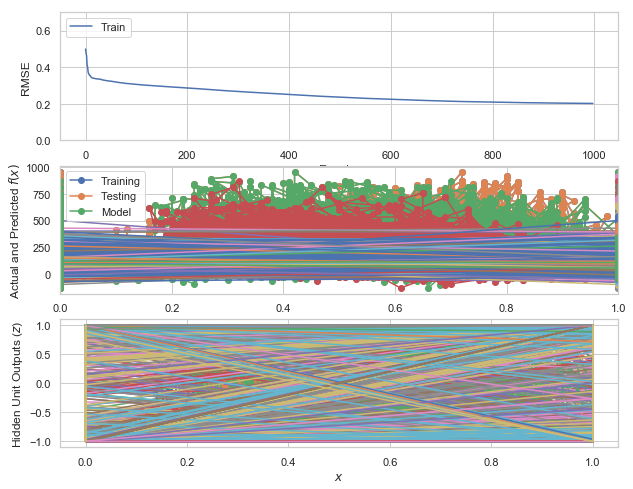

In [123]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn1.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[0],OutputTrainArray[0],'o-',inputTrainArray[0],OutputTrainArray[0],'o-',inputTrainArray[0],Y_1_train,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[0], Z_1_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[0],Y_1_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[0],Y_1_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[0],Y_1_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[0],Y_1_train))

In [124]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[0],Y_1_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[0],Y_1_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[0],Y_1_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[0],Y_1_train))

MAE: 101.29910879549385
MSE: 19748.366523210436
RMSE: 140.52888145577205
R^2 = 0.29845323481459984


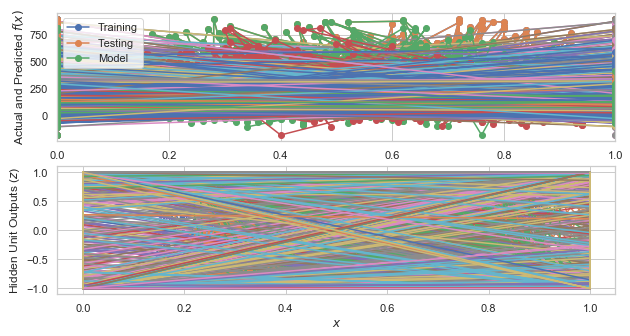

In [125]:
Y_1_test, Z_1_test = nn1.use(inputTestArray[0], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[0],OutputTestArray[0],'o-',inputTestArray[0],OutputTestArray[0],'o-',inputTestArray[0],Y_1_test,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[0], Z_1_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[0],Y_1_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[0],Y_1_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[0],Y_1_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[0],Y_1_test))

In [126]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[0],Y_1_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[0],Y_1_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[0],Y_1_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[0],Y_1_test))

## Fold 2

MAE: 70.56200160577211
MSE: 9648.162006677145
RMSE: 98.22505793674618
R^2 = 0.6535221469856693


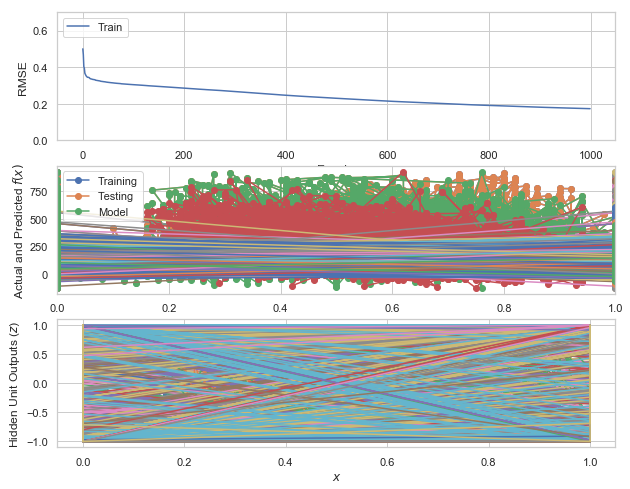

In [127]:
nn2 = NeuralNet(neuralNetConfigsArray[1])
nn2.train(inputTrainArray[1], OutputTrainArray[1].reshape((-1, 1)),ftracep=True)

Y_2_train, Z_2_train = nn2.use(inputTrainArray[1], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn2.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[1],OutputTrainArray[1],'o-',inputTrainArray[1],OutputTrainArray[1],'o-',inputTrainArray[1],Y_2_train,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[1], Z_2_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[1],Y_2_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[1],Y_2_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[1],Y_2_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[1],Y_2_train))


In [128]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[1],Y_2_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[1],Y_2_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[1],Y_2_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[1],Y_2_train))

MAE: 102.069018826774
MSE: 20482.125375544747
RMSE: 143.1157761238947
R^2 = 0.2683089827414268


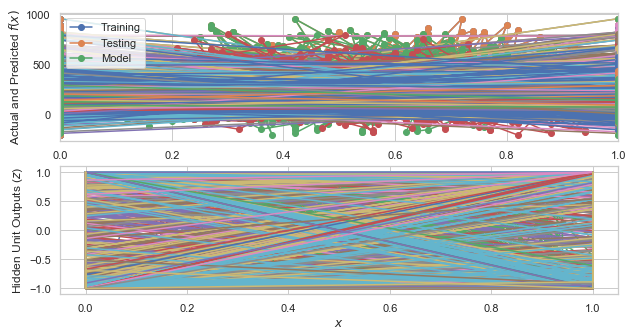

In [129]:
Y_2_test, Z_2_test = nn2.use(inputTestArray[1], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[1],OutputTestArray[1],'o-',inputTestArray[1],OutputTestArray[1],'o-',inputTestArray[1],Y_2_test,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[1], Z_2_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[1],Y_2_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[1],Y_2_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[1],Y_2_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[1],Y_2_test))



In [130]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[1],Y_2_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[1],Y_2_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[1],Y_2_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[1],Y_2_test))

## Fold 3

MAE: 90.3011448831468
MSE: 15202.596726270149
RMSE: 123.298810725287
R^2 = 0.4610912729976726


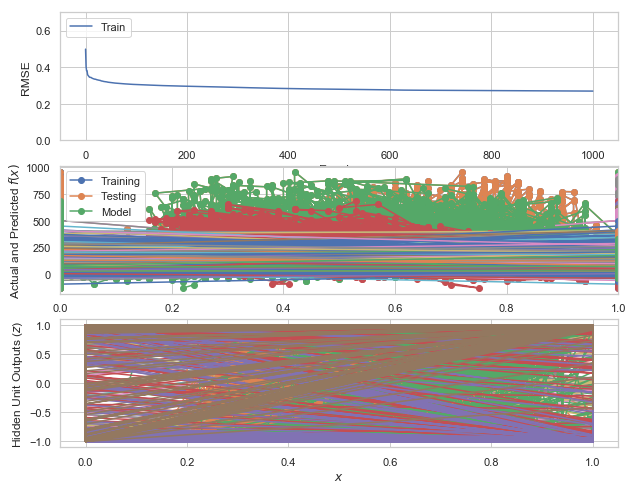

In [131]:
nn3 = NeuralNet(neuralNetConfigsArray[2])
nn3.train(inputTrainArray[2], OutputTrainArray[2].reshape((-1, 1)),ftracep=True)

Y_3_train, Z_3_train = nn3.use(inputTrainArray[2], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn3.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[2],OutputTrainArray[2],'o-',inputTrainArray[2],OutputTrainArray[2],'o-',inputTrainArray[2],Y_3_train,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[2], Z_3_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[2],Y_3_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[2],Y_3_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[2],Y_3_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[2],Y_3_train))

In [132]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[2],Y_3_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[2],Y_3_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[2],Y_3_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[2],Y_3_train))

MAE: 96.98218768735553
MSE: 16604.308367076417
RMSE: 128.85770588938954
R^2 = 0.3741810333628428


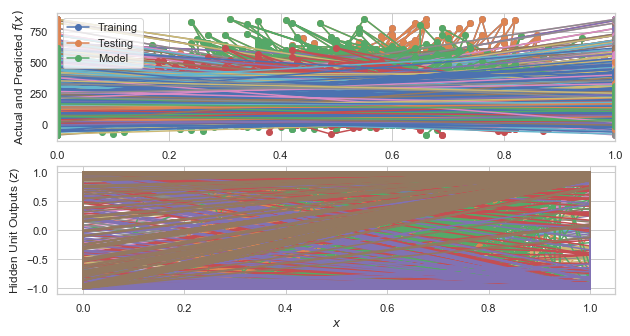

In [133]:
Y_3_test, Z_3_test = nn3.use(inputTestArray[2], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[2],OutputTestArray[2],'o-',inputTestArray[2],OutputTestArray[2],'o-',inputTestArray[2],Y_3_test,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[2], Z_3_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[2],Y_3_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[2],Y_3_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[2],Y_3_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[2],Y_3_test))



In [134]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[2],Y_3_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[2],Y_3_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[2],Y_3_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[2],Y_3_test))

## Fold 4

MAE: 84.67425489192918
MSE: 13349.358597611792
RMSE: 115.53942442998317
R^2 = 0.518297740769561


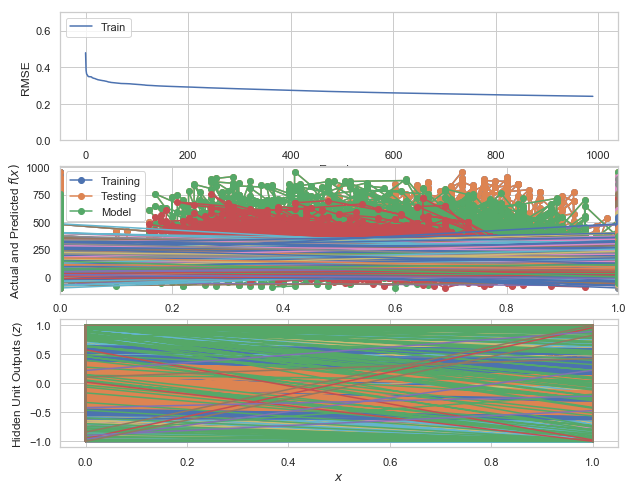

In [135]:
nn4 = NeuralNet(neuralNetConfigsArray[3])
nn4.train(inputTrainArray[3], OutputTrainArray[3].reshape((-1, 1)),ftracep=True)

Y_4_train, Z_4_train = nn4.use(inputTrainArray[3], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn4.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[3],OutputTrainArray[3],'o-',inputTrainArray[3],OutputTrainArray[3],'o-',inputTrainArray[3],Y_4_train,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[3], Z_4_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[3],Y_4_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[3],Y_4_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[3],Y_4_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[3],Y_4_train))

In [136]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[3],Y_4_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[3],Y_4_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[3],Y_4_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[3],Y_4_train))

MAE: 98.72238152698633
MSE: 18244.65646573615
RMSE: 135.0727821055602
R^2 = 0.3600704878785944


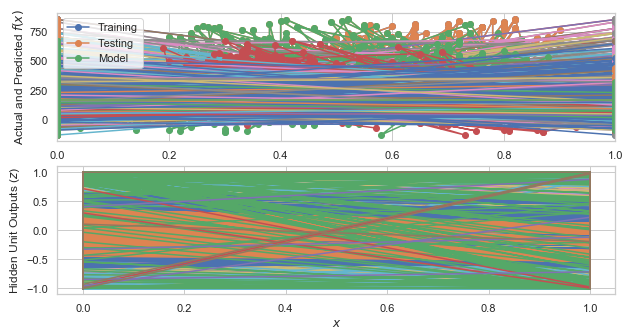

In [137]:
Y_4_test, Z_4_test = nn4.use(inputTestArray[3], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[3],OutputTestArray[3],'o-',inputTestArray[3],OutputTestArray[3],'o-',inputTestArray[3],Y_4_test,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[3], Z_4_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[3],Y_4_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[3],Y_4_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[3],Y_4_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[3],Y_4_test))



In [138]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[3],Y_4_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[3],Y_4_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[3],Y_4_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[3],Y_4_test))

## Fold5

[21, 39, 24, 36, 12, 1]
MAE: 71.94078610193071
MSE: 10139.062473922193
RMSE: 100.69291173623986
R^2 = 0.6351102569980824


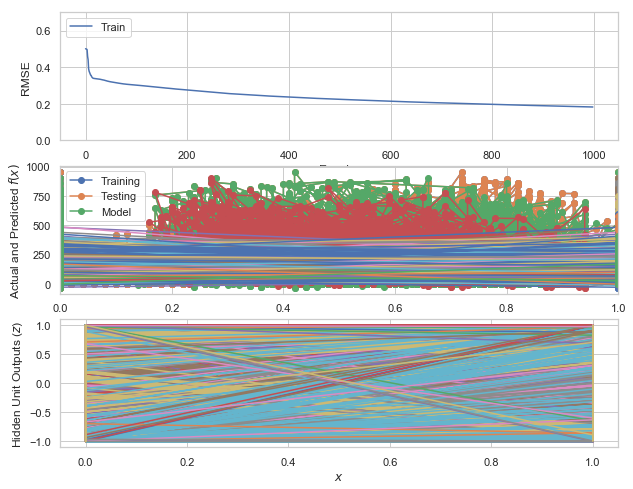

In [139]:
print(neuralNetConfigsArray[4])
nn5 = NeuralNet(neuralNetConfigsArray[4])
nn5.train(inputTrainArray[4], OutputTrainArray[4].reshape((-1, 1)),ftracep=True)

Y_5_train, Z_5_train = nn5.use(inputTrainArray[4], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn5.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[4],OutputTrainArray[4],'o-',inputTrainArray[4],OutputTrainArray[4],'o-',inputTrainArray[4],Y_5_train,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[4], Z_5_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[4],Y_5_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[4],Y_5_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[4],Y_5_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[4],Y_5_train))


In [140]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[4],Y_5_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[4],Y_5_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[4],Y_5_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[4],Y_5_train))

MAE: 104.79532814351249
MSE: 21859.7628985682
RMSE: 147.8504747999417
R^2 = 0.22492800986206618


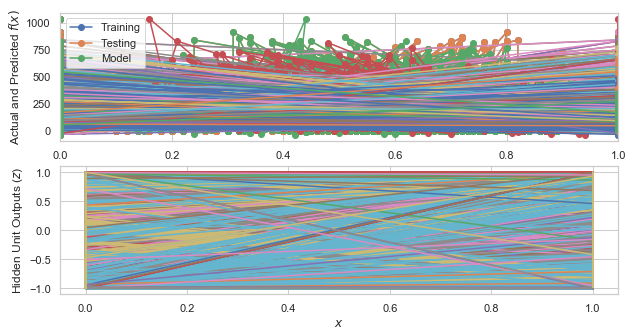

In [141]:
Y_5_test, Z_5_test = nn5.use(inputTestArray[4], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[4],OutputTestArray[4],'o-',inputTestArray[4],OutputTestArray[4],'o-',inputTestArray[4],Y_5_test,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[4], Z_5_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[4],Y_5_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[4],Y_5_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[4],Y_5_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[4],Y_5_test))

In [142]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[4],Y_5_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[4],Y_5_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[4],Y_5_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[4],Y_5_test))

#  Results

### Train Result Comparisions

<table style="width:100%">
  <tr>
    <th>Fold</th>
    <th>MAE</th>
    <th>MSE</th> 
    <th>RMSE</th>
    <th>R2</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>77.07396635971168</td> 
    <td>11224.525595709134</td>
    <td>105.94586162615855</td>
    <td>0.5962993721343253</td>  
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>70.56200160577211</td> 
    <td>9648.162006677145</td>
    <td>98.22505793674618</td>
    <td>0.6535221469856693</td>  
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>90.3011448831468</td> 
    <td>15202.596726270149</td>
    <td>123.298810725287</td>
    <td>0.4610912729976726</td>  
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>84.67425489192918</td> 
    <td>13349.358597611792</td>
    <td>115.53942442998317</td>
    <td>0.518297740769561</td>  
  </tr>
   <tr>
    <td>Fold 5</td>
    <td>80.12734275049273</td> 
    <td>12252.72136916788</td>
    <td>110.6920113159386</td>
    <td>0.5590426152486472</td>  
  </tr>
</table>

### Test Result Comparisions

<table style="width:100%">
  <tr>
    <th>Fold</th>
    <th>MAE</th>
    <th>MSE</th> 
    <th>RMSE</th>
    <th>R2</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>101.29910879549385</td> 
    <td>19748.366523210436</td>
    <td>140.52888145577205</td>
    <td>0.29845323481459984</td>  
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>102.069018826774</td> 
    <td>20482.125375544747</td>
    <td>143.1157761238947</td>
    <td>0.2683089827414268</td>  
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>96.98218768735553</td> 
    <td>16604.308367076417</td>
    <td>128.85770588938954</td>
    <td>0.3741810333628428</td>  
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>98.72238152698633</td> 
    <td>18244.65646573615</td>
    <td>135.0727821055602</td>
    <td>0.3600704878785944</td>  
  </tr>
   <tr>
    <td>Fold 5</td>
    <td>103.19283735965297</td> 
    <td>21554.038616337322</td>
    <td>146.8129374964527</td>
    <td>0.23598249457456333</td>  
  </tr>
</table>

## Plots for Result Comparision


### Training Data Plots

**MAE**

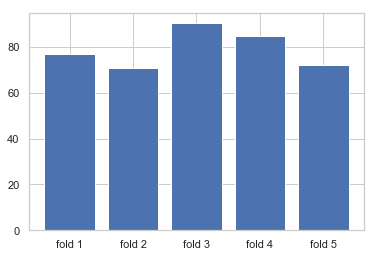

In [143]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MAEArray_train)
plt.xticks(y_pos, bars)
plt.show()

**MSE**

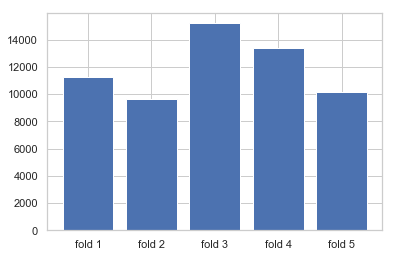

In [144]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MSEArray_train)
plt.xticks(y_pos, bars)
plt.show()


**RMSE**

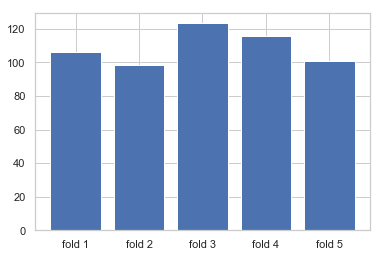

In [145]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, RMASEArray_train)
plt.xticks(y_pos, bars)
plt.show()


**R2**

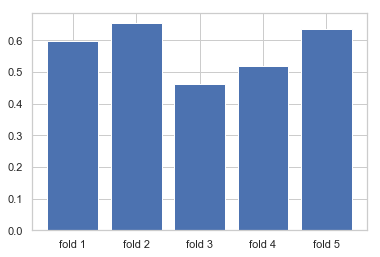

In [146]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, R2Array_train)
plt.xticks(y_pos, bars)
plt.show()


### Testing Data Plots

**MAE**

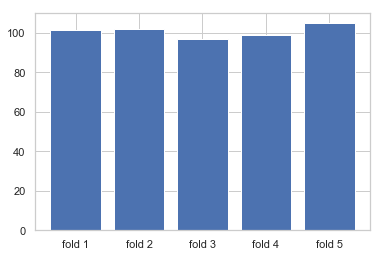

In [151]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MAEArray_test)
plt.xticks(y_pos, bars)
plt.show()

**MSE**

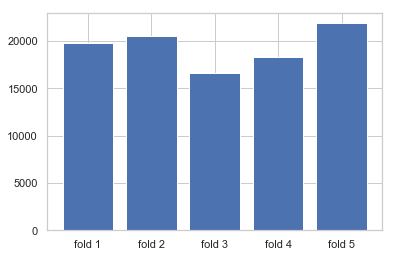

In [148]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MSEArray_test)
plt.xticks(y_pos, bars)
plt.show()

**RMSE**

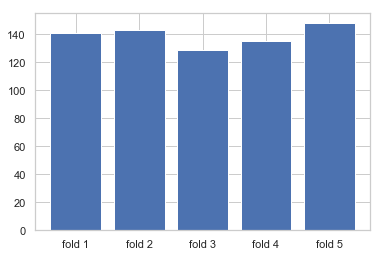

In [149]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, RMSEArray_test)
plt.xticks(y_pos, bars)
plt.show()


**R2**

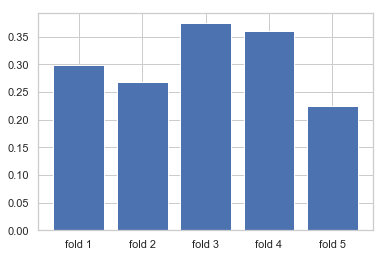

In [150]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, R2Array_test)
plt.xticks(y_pos, bars)
plt.show()


### Results

Experiment is being done with the help of k-fold cross-validation.
We can see how complex a neural network is by checking the number of layers it has and functions performed by neural network.
Number of layers and the number of nodes are varied for 5 configurations.
1. [13,39,21,1]
2. [13,39,64,1]
3. [13,26,1]
4. [13,96,1]
5. [13,39,24,36,12,1]


- In top 2 configurations, we are playing with 4 layers having a different number of nodes in the third layer.
- In the 3rd and 4th configuration, we are playing with 3 layer network with a different number of nodes.
- In the 5th configuration, we are playing with a network having 5 layers to see if the fit improves.

These error parameters are being taken into consideration: 

- MAE
- MSE
- RMSE
- R Squared

Comparing all the configurations with respect to their error parameters:
- It can be observed that the structure in the second fold gives the best fit in training but third fold gives a good fit for testing data. 
- The model of fold 1 is quite near to the second one but 2nd fold outperforms the 1st fold.

Cross-validation with k fold has been successfully completed to find the best-suited parameters for our model.

# Nonlinear Logistic Regression

- In case of the linear logistic regression, we compute the weights of all attributes and also compute the predictions.
- Softmax method helps to compute the classes' probability.
- The error function given by negative log likelihood is below.

$$
E(w) = - \sum_{n=1}^N \sum_{k=1}^K t \ln y
$$

- In case of nonlinear logistic regression we are extending our neural network to two layers.
- Also we derive the gradient to calulate the weights of hidden and output layer
- The difference would be the delta error function(log likelihood).
$$
V \leftarrow V - \alpha_h \frac{\partial E}{\partial V}
\\
W \leftarrow W - \alpha_o \frac{\partial E}{\partial W}
$$

- Computing the partial derivative of error function with respect to the weights:
$$
Vm \leftarrow V + \alpha_h  X^T \Big((T- g(X)) W^T . (1-Z^2)\Big)
\\
W \leftarrow W + \alpha_o  Z^T(T- g(X))
$$

g is Softmax function

### Explanation of Code

- Class NeuralNetLogReg inherits Class NeuralNet which is a base class.

Most of the methods used were from NeuralNet and altered some of the methods explained below: 
- softmax: This method returns the probability of the predicted values.
- forward: This is same as explained before. Added a line computing softmax of target value on the basis of value received from NeuralNet and return the updated value.
- _objectf: This method has the objective function as negative log likelihood.
- train: Passing the target values after encoding as the probabilities of each class is desired.
- use: We are returning the class predicted of our target function and the probabilities of each class.

**Below are the 3 python files provided by Professor Lee in a3.zip**

In [93]:
# UTIL.PY

import numpy as np

# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 



In [94]:
# GRAD.PY

""" Gradient Descent optimization tools 
    
    Steepest descent and scaled conjugate gradient 
    are currently implemented. 
    Reference codes are R version of Chuck Anderson's.
    
    Reference
        Chong and Zak (2008).
          http://www.engr.colostate.edu/~echong/book3/
        Moller (1993).
          http://www.sciencedirect.com/science/article/pii/S0893608005800565

                                by lemin (Minwoo Jake Lee)
        
    last modified: 10/01/2011
"""

import numpy as np
import math
from copy import copy 
import pdb
from math import sqrt, ceil
import sys
import inspect


def lineno():
    """Returns the current line number in our program."""
    #print "::: ", inspect.currentframe().f_back.f_lineno
    return inspect.currentframe().f_back.f_lineno

###########################################################
###
### Scaled Conjugate Gradient 
###
###########################################################

def scg(w, gradf, optimf, *fargs, **params):

    wprecision = params.pop("wPrecision",1.e-8)
    fprecision = params.pop("fPrecision",1.e-8)
    niter = params.pop("nIterations",1000)

    wtracep = params.pop("wtracep",False)
    ftracep = params.pop("ftracep",False)

    bwmin = params.pop("bwmin",False)
    wmin  = params.pop("wmin",1)
    bwmax = params.pop("bwmax",False)
    wmax  = params.pop("wmax",1)

    bverbose = params.pop("verbose", False)
    _beta = params.pop("beta", 1e-6)

    while True: # outmost loop to restart for RGD
        nvars = len(w)
        sigma0 = 1.0e-10
        fold = optimf(w, *fargs)
        fnow = fold
        #f = fnow
        gradnew = gradf(w, *fargs)
        gradold = copy(gradnew)
        d = -gradnew				# Initial search direction.
        success = True				# Force calculation of directional derivs.
        nsuccess = .0				# nsuccess counts number of successes.
        beta = _beta				# Initial scale parameter.
        betamin = 1.0e-15 			# Lower bound on scale.
        betamax = 1.0e5			# Upper bound on scale.
        #betamax = 1.0e20			# Upper bound on scale.
        j = 1				# j counts number of iterations.

        wtrace = []
        if wtracep:
            wtrace.append(w)
        ftrace = []
        if ftracep:
            ftrace.append(fnow) #[0,0])
        
        while j <= niter:

            ## Calculate first and second directional derivatives.
            if success:
                mu = np.dot(d,gradnew)
                if bverbose and np.isnan(mu): print("mu is NaN")
                if mu >= 0:
                    d = - gradnew
                    mu = np.dot(d,gradnew)

                kappa = np.dot(d,d)
                if kappa < np.finfo(np.double).eps:
                    return {'w':w, 
                            'f':fnow, 
                            'reason':"limit on machine precision",
                            'wtrace':wtrace if wtracep else None, 
                            'ftrace':ftrace if ftracep else None }

                sigma = sigma0/math.sqrt(kappa)
                wplus = w + sigma * d
                gplus = gradf(wplus, *fargs)
                theta = np.dot(d, (gplus - gradnew))/sigma

            ## Increase effective curvature and evaluate step size alpha.
            delta = theta + beta * kappa
            if delta is np.nan: print("delta is NaN")
            if delta <= 0.:
                delta = beta * kappa
                beta = beta - theta/kappa
            
            alpha = -mu/delta
            #print "alpha:", alpha
            ## Calculate the comparison ratio.
            wnew = w + alpha * d
            fnew = optimf(wnew, *fargs)

            if bwmin and all(wnew <= wmin): 
                return {'w':w, 
                        'f':fnow, 
                        'reason':"limit on w min.(%f)" % wmin,
                        'wtrace':wtrace if wtracep else None, 
                        'ftrace':ftrace if ftracep else None }
            if bwmax and all(wnew >= wmax):
                return {'w':w, 
                        'f':fnow, 
                        'reason':"limit on w max.(%f)" % wmax,
                        'wtrace':wtrace if wtracep else None, 
                        'ftrace':ftrace if ftracep else None }

            Delta = 2. * (fnew - fold) / (alpha*mu)
            if not np.isnan(Delta) and Delta >= 0.:
                success = True
                nsuccess = nsuccess + 1
                w = wnew
                fnow = fnew
                if wtracep:
                    wtrace.append(w)
                if ftracep:
                    ftrace.append(fnow) #[0,0])
            else:
                success = False
                fnow = fold
            #f = fnow

            #if (j % (niter /10)) ==0 and bverbose:
            #    print "SCG: Iteration %d  f=%f  scale=%f" % (j, fnow, beta)

            if success:
                ## Test for termination
                if np.max(abs(alpha*d)) < wprecision:
                    return {'w':w, 
                            'f':fnow, 
                            'reason':"limit on w Precision",
                            'wtrace':wtrace if wtracep else None, 
                            'ftrace':ftrace if ftracep else None }
                elif np.max(abs(fnew-fold)) < fprecision:
                    return {'w':w, 
                            'f':fnow, 
                            'reason':"limit on f Precision",
                            'wtrace':wtrace if wtracep else None, 
                            'ftrace':ftrace if ftracep else None }
                else:
                    ## Update variables for new position
                    fold = fnew
                    gradold = gradnew
                    gradnew = gradf(w, *fargs)
                    ## If the gradient is zero then we are done.
                    if np.dot(gradnew, gradnew) == 0:
                        return {'w':w, 
                                'f':fnow, 
                                'reason':"zero gradient",
                                'wtrace':wtrace if wtracep else None, 
                                'ftrace':ftrace if ftracep else None }
              
            ## Adjust beta according to comparison ratio.
            if np.isnan(Delta) or Delta < 0.25:
                beta = min(4.0*beta, betamax)
            elif Delta > 0.75:
                beta = max(0.5*beta, betamin)

            ## Update search direction using Polak-Ribiere formula, or re-start 
            ## in direction of negative gradient after nparams steps.

            if nsuccess == nvars:
                d = -gradnew
                nsuccess = 0
            elif success:
                gamma = np.dot(gradold - gradnew, gradnew / mu)
                d = gamma * d - gradnew

            j = j + 1

        return {'w':w, 
                'f':fnow, 
                'reason':"reached limit of nIterations",
                'wtrace':wtrace if wtracep else None, 
                'ftrace':ftrace if ftracep else None }



######################################################################
### Steepest descent
    

floatPrecision = sys.float_info.epsilon

def steepest(x,gradf, f, *fargs, **params):
    """steepest:
    Example:
    def parabola(x,xmin,s):
        d = x - xmin
        return np.dot( np.dot(d.T, s), d)
    def parabolaGrad(x,xmin,s):
        d = x - xmin
        return 2 * np.dot(s, d)
    center = np.array([5,5])
    S = np.array([[5,4],[4,5]])
    firstx = np.array([-1.0,2.0])
    r = steepest(firstx, parabola, parabolaGrad, center, S,
                 stepsize=0.01,xPrecision=0.001, nIterations=1000)
    print('Optimal: point',r[0],'f',r[1])"""

    stepsize= params.pop("stepsize",0.1)
    evalFunc = params.pop("evalFunc",lambda x: "Eval "+str(x))
    nIterations = params.pop("nIterations",1000)
    xPrecision = params.pop("xPrecision",1.e-8)
    fPrecision = params.pop("fPrecision",1.e-8)
    wtracep = params.pop("wtracep",False)
    ftracep = params.pop("ftracep",False)

    i = 1
    if wtracep:
        wtrace = np.zeros((nIterations+1,len(x)))
        wtrace[0,:] = x
    else:
        wtrace = None
    oldf = f(x,*fargs)
    if ftracep:
        ftrace = [0] * (nIterations+1) #np.zeros(nIterations+1)
        ftrace[0] = f(x,*fargs)# [0,0]
    else:
        ftrace = None
  
    while i <= nIterations:
        g = gradf(x,*fargs)
        newx = x - stepsize * g
        newf = f(newx,*fargs)
        #if i % max(1,(nIterations/10)) == 0:
        #    print "Steepest: Iteration",i,"Error",evalFunc(newf)
        if wtracep:
            wtrace[i,:] = newx
        if ftracep:
            ftrace[i] = newf #[0,0]

        if np.any(newx == np.nan) or newf == np.nan:
            raise ValueError("Error: Steepest descent produced newx that is NaN. Stepsize may be too large.")
        if np.any(np.isinf(newx)) or  np.isinf(newf):
            raise ValueError("Error: Steepest descent produced newx that is NaN. Stepsize may be too large.")
        if max(abs(newx - x)) < xPrecision:
            return {'w':newx, 'f':newf, 'nIterations':i, 'wtrace':wtrace[:i,:] if wtracep else None, 'ftrace':ftrace[:i] if ftracep else None,
                    'reason':"limit on x precision"}
        if abs(newf - oldf) < fPrecision:
            return {'w':newx, 'f':newf, 'nIterations':i, 'wtrace':wtrace[:i,:] if wtracep else None, 'ftrace':ftrace[:i] if ftracep else None,
                    'reason':"limit on f precision"}
        x = newx
        oldf = newf
        i += 1

    return {'w':newx, 'f':newf, 'nIterations':i, 'wtrace':wtrace[:i,:] if wtracep else None, 'ftrace':ftrace[:i] if ftracep else None, 'reason':"did not converge"}




In [95]:
# NN.PY

""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
import numpy as np
import matplotlib.pyplot as plt
#from grad import scg, steepest
from copy import copy
#from util import Standardizer


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y





In [96]:
class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    def _init_(self, nunits):
        super()._init_(nunits)
    
    def softmax(self, z):
        f = np.exp(z)
        return f / np.sum(f, axis=1, keepdims=True)

    def forward(self, X):
        t, Z = super().forward(X)
        return self.softmax(t), Z
    
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(np.sum(T * np.log(Y), axis= 1), axis= 0)) + wpenalty
    def train(self, X, T, **params):
        return super().train(X, T, **params)
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        G, Z = self.forward(Xs)
        classes = np.argmax(G, axis = 1)
        #prob = np.amax(G, axis = 1 )
        return classes, G

### Playing with Toy Data

Text(0.5,1,'test data set')

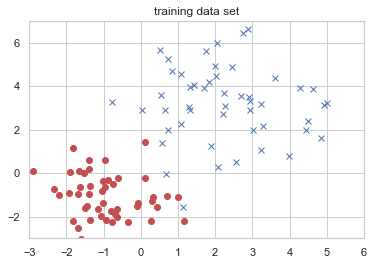

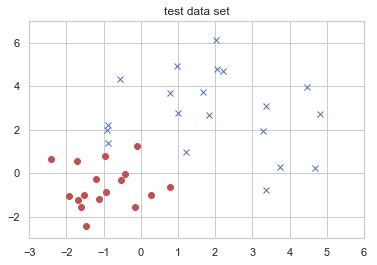

In [97]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#  Train Data
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#  Test Data
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds

plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")


In [98]:
logistic = NeuralNetLogReg([2, 4, 2])

logistic.train(Xtrain, Ttrain)
classes, Y = logistic.use(Xtest)
print(Xtest.shape)

(40, 2)


In [99]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Accuracy:  50.0 %


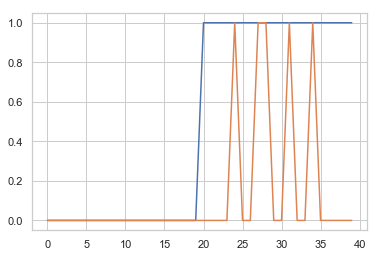

In [100]:
plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - classes)) * 100, "%")

#### Performing Non-Linear Logistic Regression on Complete Classification dataset from previous assignment

In [101]:
import pandas as pd
c_data_columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
c_complete_data= pd.read_csv("C:\\Users\\arora\\Documents\\bank-additional\\bank-additional-full.csv")
c_complete_data['y'] = c_complete_data['y'].map({'no' : 0, 'yes' : 1})
#c_complete_data = c_complete_data.sample(n= 1000)
print(c_complete_data['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


Making all string values to numerical.

In [102]:
#c_complete_data['y'] = c_complete_data['y'].map({0 : 1, 1 : 2})
c_complete_data['job'] = c_complete_data['job'].map({'admin.' : 1, 'blue-collar' : 2, 'entrepreneur' : 3, 'housemaid' : 4,'management' : 5, 'retired' : 6,'self-employed' : 7, 'services' : 8, 'student' : 9, 'technician' : 10,'unemployed' : 11, 'unknown' : 12})
c_complete_data['marital'] = c_complete_data['marital'].map({'divorced' : 1, 'married' : 2,'single' : 3, 'unknown' : 4})
c_complete_data['education'] = c_complete_data['education'].map({'basic.4y' : 1, 'basic.6y' : 2, 'basic.9y' : 3, 'high.school' : 4,'illiterate' : 5, 'professional.course' : 6,'university.degree' : 7, 'unknown' : 8})
c_complete_data['default'] = c_complete_data['default'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
c_complete_data['housing'] = c_complete_data['housing'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
c_complete_data['loan'] = c_complete_data['loan'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
c_complete_data['contact'] = c_complete_data['contact'].map({'cellular' : 1, 'telephone' : 2})
c_complete_data['month'] = c_complete_data['month'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4,'may' : 5, 'jun' : 6,'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10,'nov' : 11, 'dec' : 12})
c_complete_data['day_of_week'] = c_complete_data['day_of_week'].map({'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4,'fri' : 5})
c_complete_data['poutcome'] = c_complete_data['poutcome'].map({'failure' : 1, 'nonexistent' : 2, 'success' : 3})

In [103]:
# Splitting the data into train(90%) and test(10%)
from sklearn.model_selection import train_test_split
def split(X, T):
    return train_test_split(X, T, test_size = .1)  

In [104]:
X_train_log, X_test_log, T_train_log, T_test_log = split(c_complete_data.iloc[:,:-1].values, c_complete_data.iloc[:,-1:].values)
print("Shape of X_train_log {}, X_test_log {}, T_train_log {}, T_test_log{}".format(X_train_log.shape, X_test_log.shape, T_train_log.shape, T_test_log.shape))

Shape of X_train_log (37069, 20), X_test_log (4119, 20), T_train_log (37069, 1), T_test_log(4119, 1)


In [105]:
import numpy as np
number_classes = len(np.unique(T_train_log))
print(number_classes)

2


In [106]:
logistic_data = NeuralNetLogReg([X_train_log.shape[1], 2, number_classes])

logistic_data.train(X_train_log, T_train_log)
classes_data, prob = logistic_data.use(X_test_log)

In [107]:
print(classes_data)
print(prob)
print("Accuracy: ", 100 - np.mean(np.abs(T_test_log - classes_data)) * 100, "%")

[0 0 0 ... 0 0 0]
[[9.99999863e-01 1.37051244e-07]
 [9.99999860e-01 1.40016593e-07]
 [9.99999847e-01 1.52609488e-07]
 ...
 [9.99999061e-01 9.38840752e-07]
 [9.99999849e-01 1.51044520e-07]
 [9.99999523e-01 4.77320349e-07]]
Accuracy:  88.73512988589464 %


### Cross validation for Logistic Regression

In [109]:
def crossValidation_logistic(folds, X):
    
    XTrain, XTest, Train, TTest = split(X[:,:-1],X[:,-1:])
    
    number = int(XTrain.shape[0] / folds)
    
    number_classes = len(np.unique(Train))
    
    param_grid = [{'optim': ['scg'], '_lambda': [.001, .01, .1, 1]} ]       
    
    grid = list(ParameterGrid(param_grid)) 
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("     *********************Started the ",i+1," fold*************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], Train[lower:upper, :] # Creating 1st fold as our test data
        
        XTrain_rem, Train_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(Train, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        
        arr_cv = []
        hunits = []
        
        # Iterating next four folds
        for j in range(folds-1): 
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], Train_rem[low:high, :]
            XTrain_cv, Train_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(Train_rem, np.s_[low:high], axis= 0)
            # Tring different hyperparameters
            for k in range(len(grid)): 
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNetLogReg([XTrain.shape[1], hiddenUnits[units], number_classes])
                    nn_cv.train(XTrain_cv, Train_cv, **grid[k])
                    ypred_cv, G = nn_cv.use(X_validate)
                    arr_cv.append(np.mean(np.abs(T_validate - ypred_cv) * 100))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])
                
        # Extracting maximum accuracy index
        
        minimum = arr_cv.index(max(arr_cv))
        min_index = grid_index[minimum] 
        best_hunit = hunits[minimum]
        print(" Best set of Hyperparameters: ", grid[min_index])
        print(" Best number of hidden units: ", best_hunit)
        
        
        #for index in range(len(grid_index)): # Iterating over the indices of grid indexes to calculate test errors
        nn_cv = NeuralNetLogReg([XTrain.shape[1], best_hunit, number_classes])
        nn_cv.train(XTrain_rem, Train_rem, **grid[min_index])
        ypred_test, G = nn_cv.use(X_test)
        arr_test.append(np.mean(np.abs(T_test - ypred_test) * 100)) # Calculating test error from best parameters from validation sets
        test_index.append(min_index) # Corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" Test Accuracy for Test set: ",np.mean(np.abs(T_test - ypred_test) * 100))            
   
    index= arr_test.index(max(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("\n    Final Hyperparameters are:",final_param)
    final_units = bestUnits[index]
    print("      Final hidden units are:",final_units)
    
    nn_cv = NeuralNetLogReg([XTrain.shape[1], final_units, number_classes])
    nn_cv.train(XTrain, Train, **final_param)
    ypred, G = nn_cv.use(XTest)
    
    print("      Final Accuracy after 5-fold cross validation: ",np.mean(np.abs(TTest - ypred) * 100))
    return TTest, ypred, G


In [154]:
from sklearn.model_selection import ParameterGrid
test, Tpredicted, G = crossValidation_logistic(5, c_complete_data.values)

*********************Started the  1  fold*************************
      
Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
Best number of hidden units:  10
Test Accuracy for Test set:  71.79633767440427
     *********************Started the  2  fold*************************
      
Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
Best number of hidden units:  20
Test Accuracy for Test set:  12.92368879060049
     *********************Started the  3  fold*************************
      
Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
Best number of hidden units:  5
Test Accuracy for Test set:  78.87313694105912
     *********************Started the  4  fold*************************
      
Best set of Hyperparameters:  {'_lambda': 0.01, 'optim': 'scg'}
Best number of hidden units:  5
Test Accuracy for Test set:  11.994318227415356
     *********************Started the  5  fold*************************
      
Best set of Hyperparameters:  {'

## Results

#### Cross Validation Results Comparision for Non-Linear Logistic Regression


<table style="width:100%">
    <h4 align='center'>Results for Each Validation</h4>
  <tr>
    <th>Fold</th>
    <th>Best Hyperparameters</th>
    <th>Best Number of Hidden Units</th> 
    <th>RMSE Value</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'} </td> 
    <td>10</td>
    <td>71.79 %</td>
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'} </td> 
    <td>20</td>
    <td>12.92 %</td> 
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'}</td> 
    <td>5</td>
    <td>78.87 %</td>
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'}</td> 
    <td>5</td>
    <td>11.99 %</td> 
  </tr>
   <tr>
    <td>Fold 5</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'} </td> 
    <td>20</td>
    <td>11.52 %</td>
  </tr>
</table>

<table>
    <h4 align ='center'>Final Results After 5 fold Validation</h4>
    <tr>
        <th>Final Hyperparameters</th>
        <th>Final umber of Hidden Units</th> 
        <th>RMSE Value for original test set</th>
    </tr>
    <tr>
        <th>{'_lambda': 0.001, 'optim': 'scg'}</th>
        <th>5</th>
        <th>26.94 %</th>
    </tr>

### PLOT

Accuracy:  73.05505352684087 %


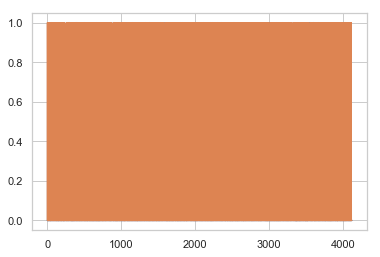

In [163]:
plt.plot(test)
plt.plot(Tpredicted)
print("Accuracy: ", 100 - np.mean(np.abs(test - Tpredicted)) * 100, "%")

This above plot signifies that the final accuracy was 73.05%, which is for an unknown data.

It can be inferred that this model can correctly predict 3 out of 4 output.

**Note for Grader:** All the other plots are made above and explained too.

### Discussion about parameter choice


Following parameters are selected in this assignment:
- Number of inputs.
- Number of hidden units.
- Number of classes.

We pass these parameters and they are extremely important for the model. Tried tuning with the number of units.
Cross-Validation function has a list having different number of hidden units with the help of which model tuning was done.

There are other hyper parameters which also can be played with during training of the model. This helps to increase the accuracy of the model.

Cross validation method has a list of dictionary (param_grid) which consists of name of parameter as key and the number of values with which we want to try for that particular parameter with other combination. 
Finally, we generated a list of all combinations parameters we want to train our model with. 

We have implemented the code with the help of optima and_lambda.
This model run for all set of parameter for first set and according to the best achieved from that, it runs same combination of parameters for the test set in each fold.
The same step is repeated for all 5 folds. 

So, according to this the final test set is prepared, and complete new data is fed to the model.

### Discussion About prediction Results

- _Lambda and optim hyperparameters are used and several hidden units are tried to achieve more accuracy.


- Fifth fold gave the highest accuracy.


- Fourth fold gave the second highest accuracy.


- First fold gave the lowest accuracy.


- Second and fourth fold gave almost same accuracy and also, they are having same number of hidden units(20).


- The overall RMSE was 26.94% which was for an unintroduced data.


- Model training took time but it learned very well.


- So, 3 out of 4 times the model will predict correctly.


- The accuracy can be increased by increasing the number of hyperparameters.


- Cross-validation is done too.

# Conclusions

1. Neural networks can have a problem of overfitting which can be resolved.
2. Neural networks works very well for complex problems like voice recognition. 
3. Also, they facilitate deep learning.

This was a tough task to complete. There are several new things learnt in this assignment.

- Neural Network: Implemented neural networks and main supervised learning techniques are:
 1. Non-Linear Regression.
 2. Non-Linear Logistic Regression.

We have done it on classification and regression data and also cross- validation is done.

- Better accuracy was acheived by tuning of hyperparameters.
- Accuracy can also be improved by using more hyperparameters.
- This took a lot of time to run as the time complexity is too high. We can work on reducing this.
- Cross Validation: This helps to deal with the problem of overfitting and underfitting of the model. 

Therefore, we train the model iteratively until it is ready to predict the new, never introduced values.
 
Hence, it is better to have a network with multiple layers than one with few layers and more nodes in a layer.

**Note: Assignment has been completed in full.**

# REFERENCES
[1] S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing", Decision Support Systems, Elsevier, 62:22-31, June 2014, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[2] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[3] "Statistical classification”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Statistical_classification

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

[7] Janio, "Melbourne || Comprehensive Housing Market Analysis", Kaggle, Data Repository, https://www.kaggle.com/janiobachmann/melbourne-comprehensive-housing-market-analysis

[8] Jake VanderPlas, "Multiple Subplots", Python Data Science Handbook, https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

[9] Hack-R, Stack Overflow, "Pandas: ValueError: cannot convert float NaN to integer"(2018) , https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer?rq=1

[10] P.Madan, "Machine Learning", Github, Repository, https://github.com/prashantmadaan

[11] DanB, "Handling Missing Values", Kaggle, Data Repository, https://www.kaggle.com/dansbecker/handling-missing-values

[12] Discriminant-Function-Analysis(Textbook), "Discover Which Variables Discriminate Between Groups, Discriminant Function Analysis", www.statsoft.com/Textbook/Discriminant-Function-Analysis

[13] Mohammed Sunasra, "Performance Metrics for Classification problems in Machine Learning", Thalus, Medium(2017), https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

[14] Mahat,"LogisticRegression", Github, Repository(2016), https://github.com/mahat/LogisticRegression

[15] Skymind, "A Beginner's Guide to Neural Networks and Deep Learning", AI Wiki(2018),https://skymind.ai/wiki/neural-network

[16] Matplotlib library, "matplotlib.pyplot.xlim", Matplotlib (2014),https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html

[17] D. Arora, "Machine Learning", Github, Repository, https://github.com/dhananjay-arora/Machine-Learning

[18] Scikit-learn, "3.2.4.1.5. sklearn.linear_model.LogisticRegressionCV", ScikitLearn library, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

## Grammar and Spelling errors

Proofread by Grammarly